# Pokémon: Uma análise sobre a franquia mais famosa de rinha de animais

### _Integrantes:_
- João Victor Azevedo Porto
- João Victor Rodrigues de Almeida Alves
- Lucas Nóbrega Albuquerque
- Samuel Pessoa de Castro

## _Introdução_

_Pocket Monsters_, do original ポケットモンスター, popularmente conhecido como Pokémon, é uma franquia transmídia japonesa lançada originalmente como uma série de jogos no ano de 1996, pela _Nintendo_. Seu criador, Satoshi Tajiri, desenvolveu a ideia do jogo através de um hobby de infância: Colecionar Insetos. Dai que vem a base do jogo, na qual se consiste numa aventura em um mundo fantasioso repleto de criaturas chamadas de "Pokemons", onde o protagonista captura e coleciona tais monstrinhos.

Até os dias de hoje, a franquia segue firme na cultura pop, com mais de 20 jogos, contando os principais e os _spin-offs_, Pokémon é um tremendo sucesso mundialmente tendo sido adaptado para todo tipo de mídia, como, por exemplo, animações, filmes, quadrinhos e jogos de cartas colecionáveis. Sendo lançado continuamente há quase 30 anos, Pokémon continua cativando seu público e atraindo cada vez mais pessoas para esse universo mágico.

Nós, integrantes, possuimos um apego à franquia. Já tendo assistido as animações ou jogado aos jogos, vimos uma oportunidade de trabalhar com algo que apreciamos e, a partir dai, resolvemos iniciar este trabalho. Tendo uma base de dados muito grande sobre a franquia, mas, principalmente, sobre os próprios pokémons em si, o seguinte projeto tem como objetivo analisar quais são as versões de maior sucesso da franquia Pokémon, nos mais diversos meios midiáticos, além de também analisar sobre os próprios pokemons em si, visando construir a melhor equipe possível.

# _Bibliotecas_

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
from sklearn.cluster import KMeans

# _Dados Utilizados_

In [ ]:
data_st = pd.read_csv(r"C:\pokemon_datasets\Pokedex_Ver_SV2.csv", sep = ';') # Pokémon: Stats / Tipagem
df = pd.read_csv(r"C:\Users\jaozi\Downloads\Datasets-Pokemon\anime.csv") # Animes de pokémon
favs = pd.read_csv(r"C:\Users\jaozi\Downloads\Datasets-Pokemon\Favourite Pokémon responses - Results.csv") # Favoritos da Comunidade
gamedata= pd.read_csv(r"NINTENDOjogosvendas.csv") # Venda dos jogos

## Consoles / Videogames

O dataset que eu utilizei foi um que encontrei no Kaggle, que continha dados sobre todos os jogos lançados da NINTENDO, e seus dados vão até 2020, esse dataset tem 10 colunas que representam ranking de vendas, nome, plataforma que o jogo foi lançado, ano que o jogo foi lançado, genêro de cada jogo, a empresa que lançou o jogo(que no caso todos foram da NINTENDO) e o resto das colunas com o total de vendas em cada continente do mundo, e o total global. O dataset tem mais de 16 mil linhas e teve que ser filtrado para responder as perguntas.

## Quantidade de Linhas


In [22]:
len(gamedata)

16599

## Animes

O dataset sobre os animes se baseia no site My Anime List, que é um dos maiores sites sobre animações japonesas do mundo. Tendo dados até a metade de 2023, o dataset possui 39 colunas e mais de 24 mil linhas sobre as mais diversas animações já lançadas.

Nele temos, majoritariamente, dados do tipo categórico (object), que detalham algo acerca do anime. Todavia, possuimos também alguns dados do tipo quantitativo (int e float), que serão primordias para nos ajudar à responder as perguntas. Podemos ver também alguns dados do tipo booleano, mas que não serão utilizados.

Entretanto, este é um dataset muito extenso e iremos precisar encurta-lo para usar somente o necessário.

### Quantidade de Linhas

In [30]:
len(df)

24985

### Colunas

In [31]:
# Colunas do dataset
df.columns

Index(['anime_id', 'title', 'type', 'score', 'scored_by', 'status', 'episodes',
       'start_date', 'end_date', 'source', 'members', 'favorites',
       'episode_duration', 'total_duration', 'rating', 'sfw', 'approved',
       'created_at', 'updated_at', 'start_year', 'start_season',
       'real_start_date', 'real_end_date', 'broadcast_day', 'broadcast_time',
       'genres', 'themes', 'demographics', 'studios', 'producers', 'licensors',
       'synopsis', 'background', 'main_picture', 'url', 'trailer_url',
       'title_english', 'title_japanese', 'title_synonyms'],
      dtype='object')

### Tipo de cada coluna

In [32]:
# Verificando os tipos de cada coluna
df.dtypes

anime_id              int64
title                object
type                 object
score               float64
scored_by             int64
status               object
episodes            float64
start_date           object
end_date             object
source               object
members               int64
favorites             int64
episode_duration     object
total_duration       object
rating               object
sfw                    bool
approved               bool
created_at           object
updated_at           object
start_year          float64
start_season         object
real_start_date      object
real_end_date        object
broadcast_day        object
broadcast_time       object
genres               object
themes               object
demographics         object
studios              object
producers            object
licensors            object
synopsis             object
background           object
main_picture         object
url                  object
trailer_url         

## Pokémon: Stats / Tipagem

Aqui, nesse dataframe, há diversas informações sobre cada pokémon existente desde a primeira geração até a atual.

### Tais informações, apresentadas nas colunas, englobam:

- Número na Pokédex
- Nome do Pokémon
- Sua Geração de Origem
- Altura (em metro) / Peso (em quilograma)
- Os Dois Tipos do Pokémon, seu Principal e Secundário
- Possíveis Habilidades do Pókemon
- Cor do Pokémon
- Porcentagem de separação entre Macho/Fêmea
- Informações sobre Procriação
- Informações sobre ganho de Experiência
- Categoria em que o Pokémon é apresentado
- Valor booleano se é uma Megaevolução ou é uma forma Regional
- Estatísticas do Pokémon, como:
    - HP
    - Ataque
    - Defesa
    - Ataque Especial
    - Defesa Especial
    - Velocidade
    - Soma Total das Estatísticas
- Ganhos de EV

In [3]:
data_st.columns

Index(['No', 'Branch_Code', 'Original_Name', 'Name', 'Gen', 'Height', 'Weight',
       'Type1', 'Type2', 'Ability1', 'Ability2', 'Ability_Hidden', 'Color',
       'Gender_Male', 'Gender_Female', 'Gender_Unknown', 'Egg_Cycles',
       'Egg_Steps', 'Egg_Group1', 'Egg_Group2', 'Get_Rate', 'Base_Experience',
       'Experience_Type', 'Category', 'Mega_Evolution_Flag',
       'Region_Form_Flag', 'HP', 'Attack', 'Defense', 'SP_Attack',
       'SP_Defense', 'Speed', 'Total', 'E_HP', 'E_Attack', 'E_Defense',
       'E_SP_Attack', 'E_SP_Defense', 'E_Speed'],
      dtype='object')

### Dimensão do Dataframe

O dataframe utilizado contém os Pokémon organizados em Linhas e as informações sobre eles diferenciado em Colunas.

In [4]:
print(f"Número de Linhas do Dataframe: {data_st.shape[0]}")
print(f"Número de Colunas do Dataframe: {data_st.shape[1]}")

Número de Linhas do Dataframe: 1226
Número de Colunas do Dataframe: 39


Portanto, existem no total, 1227 Pokémon e 39 características sobre cada um deles nesse dataframe.

### Primeiras linhas do Dataframe

In [6]:
data_st.iloc[:, :20].head()

,No,Branch_Code,Original_Name,Name,Gen,Height,Weight,Type1,Type2,Ability1,Ability2,Ability_Hidden,Color,Gender_Male,Gender_Female,Gender_Unknown,Egg_Cycles,Egg_Steps,Egg_Group1,Egg_Group2
0,1,1_0,Bulbasaur,Bulbasaur,1,0.7,6.9,Grass,Poison,Overgrow,NaN,Chlorophyll,Green,87.5,12.5,0,20,NaN,Monster,Grass
1,2,2_0,Ivysaur,Ivysaur,1,1.0,13.0,Grass,Poison,Overgrow,NaN,Chlorophyll,Green,87.5,12.5,0,20,NaN,Monster,Grass
2,3,3_0,Venusaur,Venusaur,1,2.0,100.0,Grass,Poison,Overgrow,NaN,Chlorophyll,Green,87.5,12.5,0,20,NaN,Monster,Grass
3,3,3_1,Venusaur,Mega Venusaur,1,2.4,155.5,Grass,Poison,Thick Fat,NaN,NaN,Green,87.5,12.5,0,20,NaN,Monster,Grass
4,4,4_0,Charmander,Charmander,1,0.6,8.5,Fire,NaN,Blaze,NaN,Solar Power,Red,87.5,12.5,0,20,NaN,Monster,Dragon


In [7]:
data_st.iloc[:, 20:39].head()

,Get_Rate,Base_Experience,Experience_Type,Category,Mega_Evolution_Flag,Region_Form_Flag,HP,Attack,Defense,SP_Attack,SP_Defense,Speed,Total,E_HP,E_Attack,E_Defense,E_SP_Attack,E_SP_Defense,E_Speed
0,45,64,1059860,Ordinary,0,0,45,49,49,65,65,45,318,0,0,0,1,0,0
1,45,142,1059860,Ordinary,0,0,60,62,63,80,80,60,405,0,0,0,1,1,0
2,45,263,1059860,Ordinary,0,0,80,82,83,100,100,80,525,0,0,0,2,1,0
3,45,281,1059860,Ordinary,1,0,80,100,123,122,120,80,625,0,0,0,2,1,0
4,45,62,1059860,Ordinary,0,0,39,52,43,60,50,65,309,0,0,0,0,0,1


Analisando superficiamente o dataframe, utilizando como exemplo o Pokémon na linha 0, obtemos:

- Número da Pokedéx: 1
- Nome: Bulbasaur
- Geração: 1
- Altura: 0.7 m / Peso: 6.9 kg
- Tipo Principal: Grama
- Tipo Secundário: Venenoso
- Habilidade 1: Overgrow / Habilidade 2: Nenhuma / Habilidade Secreta: Chlorophyll
- Cor: Verde
- Porcetagem de chance de ser:
    - Macho: 87.5%
    - Fêmea: 12.5%
- É conhecido a porcentagem de Macho/Fêmea
- Precisa de 20 ciclos de passos para rachar o Ovo do Pokémon
- Passos por ciclo: Não  informado
- Grupo de procriação 1: Monstro / Grupo de procriação 2: Grama
- Chance de Captura: 45
- Experiência Base: 64
- Precisa de 1.059.860 de experiência para evoluir para o level máximo.
- É um Pokémon normal (Não Lendário)
- Não é Megaevolução
- Não é uma forma Regional
- Stats Básicos do Pokémon: 
    - HP: 45
    - Ataque: 49 
    - Defesa: 49
    - Ataque Especial: 65
    - Defesa Especial: 65
    - Velocidade: 45
    - Soma Total das Estatísticas: 318
- Ao derrotar um Bulbasaur, o Pokémon vitorioso ganha 1 estatística de Ataque Especial como EV

## Pokémons favoritos

O dataset sobre os Pokémons favoritos da comunidade foi feito através de uma pesquisa na rede social reddit, dentro do sub r/pokemon. Foram 52725 votos entre 800 diferentes pokémons, da primeira até a sétima geração. Como vemos acima, temos muitas colunas do tipo categórico e poucas do tipo numérico. Entretanto, o arquivo csv original foi feito de maneira incomum, o que dificulta à visualização e o entendimento dos dados no geral. Faremos alguns ajustes nele.

### Quantidade de Linhas

In [55]:
len(favs)

809

### Colunas

In [57]:
favs.columns

Index(['Pokemon', 'Votos', 'Tipo', 'Geracao', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Select a Pokémon here to see how many votes it got',
       'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Top', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Number of pokemon by number of votes', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'By type', 'Psychic', 'Unnamed: 23', 'By Gen', '5'],
      dtype='object')

### Tipo de cada coluna

In [60]:
favs.dtypes

Pokemon                                                object
Votos                                                   int64
Tipo                                                   object
Geracao                                                 int64
Unnamed: 4                                             object
Unnamed: 5                                            float64
Unnamed: 6                                             object
Select a Pokémon here to see how many votes it got     object
Unnamed: 8                                             object
Unnamed: 9                                             object
Unnamed: 10                                           float64
Unnamed: 11                                            object
Unnamed: 12                                            object
Top                                                    object
Unnamed: 14                                            object
Unnamed: 15                                            object
Unnamed:

In [64]:
favs['Votos'].sum()

52725

# _Pré-processamento dos Dados_

## Console / Videogames

A maior ferramenta que me ajudou no processamento dos dados foi o Google Sheets, que é um excel só que da google, que ja tinha várias funções de filtros que são fáceis de utilizar e também é possivel visualizar os dados de forma mais clara.

## Animes

Como temos um dataset com uma quantidade absurda de animes desnecessários, vamos criar uma varíavel para armazenar somente aquelas animações que possuam a palavra "Pokemon" no título.

### Polimento das linhas

In [3]:
poke_animes = df[df['title'].str.contains('Pokemon')] # Filtando para somente os animes que tenha 'Pokemon' no título.

Temos agora um dataset com 124 linhas, ao invés de 24 mil. É notável que há tipos diferentes de animações, mas iremos trabalhar somente com os do tipo 'tv' e 'movie'. Portanto, vamos armazena-las em duas novas variáveis.

### Polimento dos tipos de animação

In [4]:
animes_tv = poke_animes[poke_animes['type'] == 'tv'] # Séries Animadas lançadas para Tv
animes_movies = poke_animes[poke_animes['type'] == 'movie'] # Filmes animados

O "animes_tv" já está todo em ordem e pronto para ser analisado. Porém, no "animes_movies" temos alguns títulos que não queremos utilizar. Então vamos reduzir os filmes para aqueles que contenham a palavra 'Movie' no título.

### Polimento dos filmes

In [5]:
animes_movies = animes_movies[animes_movies['title'].str.contains('Movie')] # Filtrando para somente aqueles que contenham 'Movie' no título.

Pronto, agora estamos prontos para a análise.

## Pokémon: Stats / Tipagem

### Polimento das colunas

Como apresentado anteriormente, esse é um dataframe bastante extenso, com diversas colunas irrelevantes para o que desejamos analisar, nesse caso, vamos filtrar as colunas que vamos utilizar:

In [49]:
data_st = data_st[['No', 'Name', 'Type1', 'Type2', 'Gen', 'HP', 'Attack', 'Defense', 'SP_Attack', 'SP_Defense', 'Speed', 'Total']]
data_st.head()

,No,Name,Type1,Type2,Gen,HP,Attack,Defense,SP_Attack,SP_Defense,Speed,Total
0,1,Bulbasaur,Grass,Poison,1,45,49,49,65,65,45,318
1,2,Ivysaur,Grass,Poison,1,60,62,63,80,80,60,405
2,3,Venusaur,Grass,Poison,1,80,82,83,100,100,80,525
3,3,Mega Venusaur,Grass,Poison,1,80,100,123,122,120,80,625
4,4,Charmander,Fire,NaN,1,39,52,43,60,50,65,309


### Polimento dos Tipos

Como é notório no dataframe, alguns Pokémon possuem apenas um tipo, nesse dataframe, esses Pokémon não possuem valor no tipo secundário (representado por NaN), o que pode atrapalhar a visualização dos dados, portanto, vamos adicionar a string 'Monotype' para a tipagem secundária, sinalizando que o Pokémon é tipo único.

In [50]:
data_st  = data_st.fillna(value='Monotype')
data_st.head()

,No,Name,Type1,Type2,Gen,HP,Attack,Defense,SP_Attack,SP_Defense,Speed,Total
0,1,Bulbasaur,Grass,Poison,1,45,49,49,65,65,45,318
1,2,Ivysaur,Grass,Poison,1,60,62,63,80,80,60,405
2,3,Venusaur,Grass,Poison,1,80,82,83,100,100,80,525
3,3,Mega Venusaur,Grass,Poison,1,80,100,123,122,120,80,625
4,4,Charmander,Fire,Monotype,1,39,52,43,60,50,65,309


### Polimento das Duplicatas do Mesmo Pokémon
Nos dados apresentados, é mostrado outras formas do mesmo Pokémon, que são as Megaevoluções, as Formas Regionais, tais como a forma de Alola e Galar e as Formas Especiais de Paldea, que possuem o mesmo número na Pokedéx de seu Pokémon de origem. Essas duplicatas atrapalhariam na análise do projeto, portanto, vamos eliminá-las.

In [51]:
data_st = data_st.drop_duplicates('No', keep='first')
data_st.head()

,No,Name,Type1,Type2,Gen,HP,Attack,Defense,SP_Attack,SP_Defense,Speed,Total
0,1,Bulbasaur,Grass,Poison,1,45,49,49,65,65,45,318
1,2,Ivysaur,Grass,Poison,1,60,62,63,80,80,60,405
2,3,Venusaur,Grass,Poison,1,80,82,83,100,100,80,525
4,4,Charmander,Fire,Monotype,1,39,52,43,60,50,65,309
5,5,Charmeleon,Fire,Monotype,1,58,64,58,80,65,80,405


### Nova Dimensão do Dataframe
Agora, polido, vamos verificar a quantidade de linhas e colunas que vamos utilizar no projeto:

In [11]:
print(f"Número de Linhas do Dataframe: {data_st.shape[0]}")
print(f"Número de Colunas do Dataframe: {data_st.shape[1]}")

Número de Linhas do Dataframe: 1030
Número de Colunas do Dataframe: 12


Note que o número real de Pokémon existentes, sem contar as formas regionais e mega, é 1031.

## _Pokémons favoritos_

Como dito anteriormente, temos um embaralhamento confuso nesse dataset. Todavia, iremos utilizar somente as quatro primeiras colunas. Portanto, vamos filtrar o dataset para excluirmos as colunas desnecessárias.

### Polimento das colunas

In [63]:
favs = favs.filter(items=['Pokemon', 'Votos', 'Tipo', 'Geracao']) # filtrando para as colunas necessárias.
favs

,Pokemon,Votos,Tipo,Geracao
0,Bulbasaur,710,Grass Poison,1
1,Ivysaur,83,Grass Poison,1
2,Venusaur,127,Grass Poison,1
3,Charmander,374,Fire,1
4,Charmeleon,70,Fire,1
...,...,...,...,...
804,Stakataka,13,Rock Steel,7
805,Blacephalon,8,Fire Ghost,7
806,Zeraora,17,Electric,7
807,Meltan,3,Steel,7


Feito. Com isso, já podemos analisar e responder as perguntas.

# _Perguntas a serem respondidas:_


- 1. Quais são os jogos mais vendidos de pokémon?
- 2. Quais são as temporadas e os filmes mais bem avaliadas de pokémon?
- 3. Quantos pokémon existem em cada geração e em cada tipo?
- 4. Quais são os 10 pokémon mais fortes, estatisticamente?
- 5. Qual a correlação entre o tipo dos pokémon e os seus stats? Existem tipos mais fortes que outros?
- 6. Quais são os pokémon preferidos da comunidade e quais os menos?

### _Medidas de Centralidade e Dispersão:_

Começamos criando funções para calcular as medidas de centralidade e dispersão de qualquer dataset.

In [16]:
def Media(data, column): # Calcular a média de qualquer coluna
    media = np.mean(data[column])
    print(f"Média: {media:.2f}")

def Mediana(data, column): # Calcular a mediana de qualquer coluna
    mediana = np.median(data[column])
    print(f"Mediana: {mediana:.2f}")

def Variancia(data, column): # Calcular a variância de qualquer coluna
    variancia = np.var(data[column])
    print(f"Variância: {variancia:.2f}")

def DesvioPadrao(data, column): # Calcular o desvio padrão de qualquer coluna
    desvio_padrao = np.std(data[column])
    print(f"Desvio Padrão: {desvio_padrao:.2f}")

def Correlacao(data, column1, column2): # Calcular a correlação entre duas colunas
    correlacao = data[column1].corr(data[column2])
    print(f"Correlação entre {column1} e {column2} é de: {correlacao:.2f}")

## 1. Quais são os jogos mais vendidos de pokémon?

Os jogos mais vendidos foram: Pokemon Red/Pokemon Blue, Pokemon Gold/Pokemon Silver, Pokemon Diamond/Pokemon Pearl, Pokemon Ruby/Pokemon Sapphire, Pokemon Black/Pokemon White, que juntos somam 104 milhões de dólares em vendas, que é cerca de 42% do valor total de vendas de todos os jogos lançados até 2015.

### Gráfico de Barras

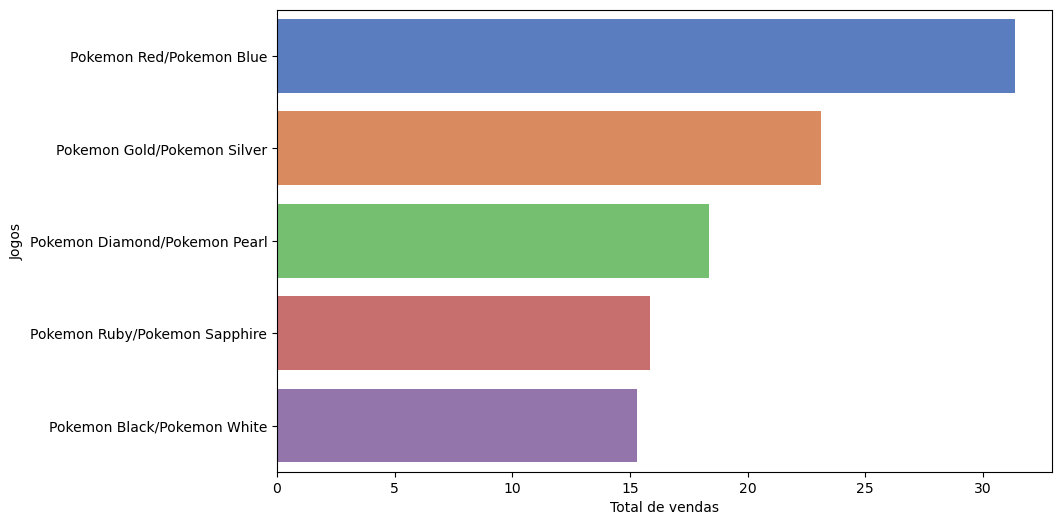

In [2]:
dados = pd.read_csv('vendaspokemonn.csv', sep=',') #lendo o dataset
nome = dados['name'].head(5)
vendas = dados['global_sales'].head(5) 


plt.figure(figsize=(10, 6)) #definindo tamanho do gráfico
grafico = sns.barplot(x=vendas, y=nome,  palette='muted') #criando o grafico
grafico.set_ylabel('Jogos') #nome para o eixo x
grafico.set_xlabel('Total de vendas') #nome para o eixo y


plt.show()

Para criar esse gráfico eu utilizei a função sum() do pandas para somar todos os valores que estavam no mesmo ano, e então criei um dataframe com essas informações para usá-los no gráfico de barras a seguir, que mostra o total de vendas em milhões de dólares para cada ano.


### Gráfico de Barras

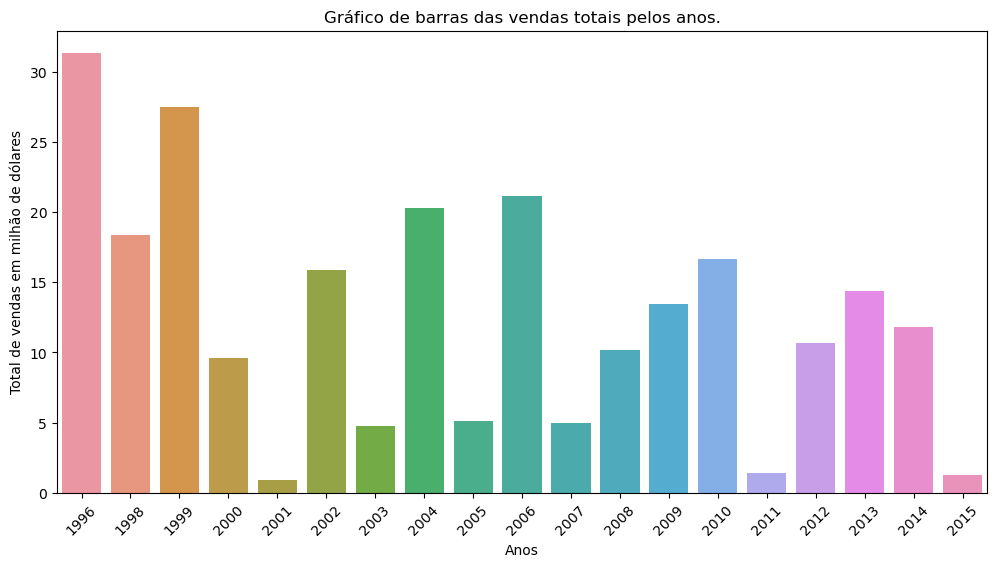

In [18]:
vendas_data = {
    'Ano': [1996, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'Vendas Globais': [31.37, 18.34, 27.49, 9.57, 0.89, 15.85, 4.76, 20.31, 5.12, 21.15, 4.96, 10.14, 13.48, 16.65, 1.43, 10.65, 14.35, 11.82, 1.28]
}
df_vendas = pd.DataFrame(vendas_data)
plt.figure(figsize=(12, 6))
grafico = sns.barplot(data=vendas_data, x='Ano', y='Vendas Globais')  #criação do gráfico
plt.title('Gráfico de barras das vendas totais pelos anos.')
grafico.set_xlabel('Anos') #nome para eixo x
grafico.set_ylabel('Total de vendas em milhão de dólares') #nome para eixo y
plt.xticks(rotation=45)


plt.show()

Para criar esse gráfico eu tive que contar a quantidade de jogos lançados pelos anos e criar um dataframe para usar no gráfico, e para relacionar que mesmo a NINTENDO lançando mais jogos pelos anos, o lucro reduziu muito se for comparado ao lucro obtido pelos jogos lançados nos anos 90.

### Gráfico de Linha

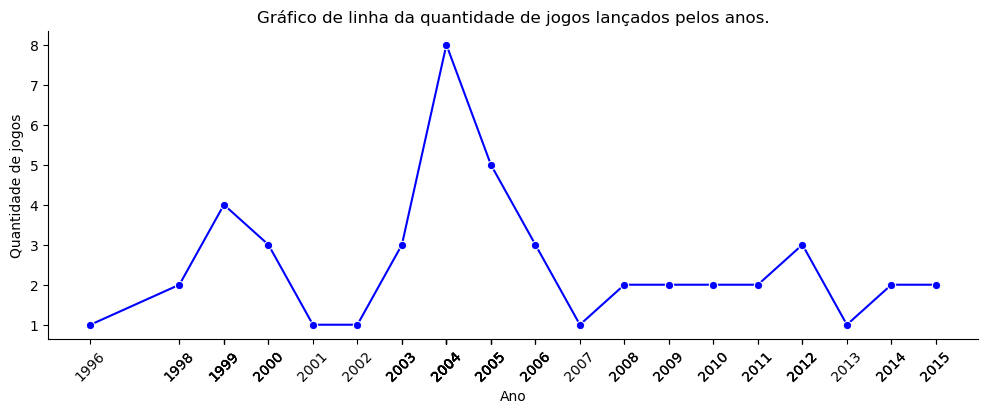

In [19]:
jogos_data = {
    'Ano': [1996, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
    'Jogos Lançados': [1, 2, 4, 3, 1, 1, 3, 8, 5, 3, 1, 2, 2, 2, 2, 3, 1, 2, 2]
}

dfjogos = pd.DataFrame(jogos_data)
plt.figure(figsize=(12, 4)) #tamanho do gráfico
grafico = sns.lineplot(data=jogos_data, x='Ano', y='Jogos Lançados' , marker='o', color='blue',linewidth=1.5) #criação do gráfico
grafico.set_xlabel('Ano') #nome para eixo x
grafico.set_ylabel('Quantidade de jogos') #nome para o eixo y
sns.despine() 
plt.title('Gráfico de linha da quantidade de jogos lançados pelos anos.') #título do gráfico
plt.xticks(rotation=45) #girando os anos do eixo x para que eles não se sobreponham
plt.xticks(dados['year'])

plt.show()

## 2. Quais as temporadas e os filmes mais bem avaliados pelo público?

Para responder à essa pergunta, primeiro vamos ver como se comporta o boxplot das animações.

### Gráfico Boxplot

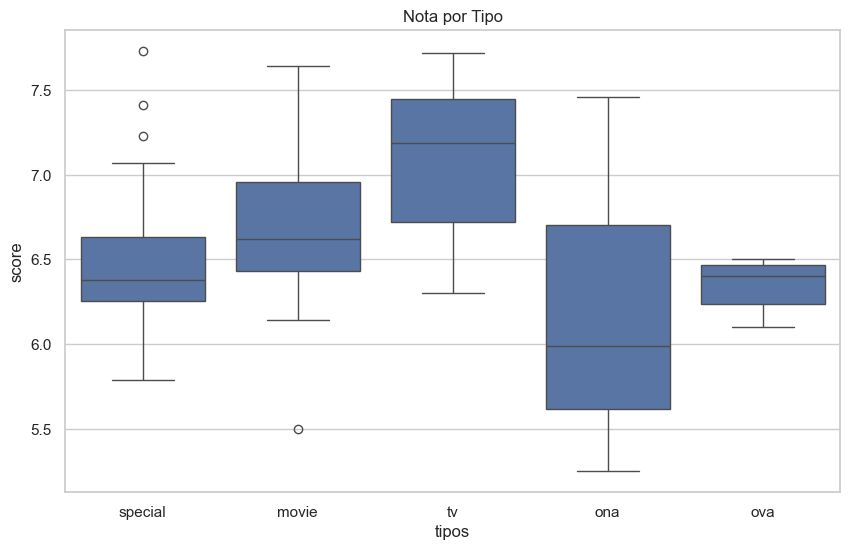

In [140]:
poke_animes = poke_animes[poke_animes['type'] != 'music'] # excluindo as animações do tipo 'música'

plt.figure(figsize=(10, 6)) # tamanho da figura
sns.boxplot(data=poke_animes, x='type', y='score') # função pra criar o boxplot
plt.title('Nota por Tipo') # título
plt.xlabel('tipos') # nome pro eixo x
plt.ylabel('score') # nome pro eixo y
plt.show() # mostrar gráfico

Para criar os boxplot, passamos o nosso dataset 'poke_animes' que contém todos tipos de animações, mas, antes, removemos a animação do tipo 'música', pois ela não é útil. Como eixo x utilizamos os tipos de animação e como eixo y as notas.

Olhando para o gráfico podemos ver 5 tipos diferente de animação. São eles:

- Special é um termo bem abrangente no meio dos animes, pois podem se referir à episódios de recapitulação da história, episódios contando uma história extra/especial entre uma temporada e outra ou podem, até mesmo, ser uma continuação direta da história principal. Tv Special é composta, normalmente, por apenas um episódio.

- Movie se refere à todos filmes da franquia. Ao todo foram 23 filmes lançados até o ano de 2020, sendo 20 deles histórias originais e 3 reboots.

- Tv são os animes lançados na Tv Japonesa. Contando tudo, são mais de 20 temporadas lançadas e mais de 1300 episódios. Sendo lançado desde 1997, cada temporada é uma reimaginação da história do jogo de mesmo nome.

- Ona (Original Web Animation) são episódios lançados diretamente na internet.

- Ova (Original Video Animation) são episódios lançados diretamente no dvd que não foram ao ar na televisão. Podem ser tanto adaptação do material original, quanto uma história original.

Entretanto, neste projeto iremos trabalhar apenas com as animações do tipo 'Tv' e 'Movie'.

Vamos analisar como estão distribuidas as notas dessas animações. Demonstraremos isso através do gráfico de sino.

### Gráfico de Sino

In [8]:
mediat = animes_tv['score'].mean() # média de nota das temporadas
dpa = animes_tv['score'].std() # desvio padrão das temporadas
mediaf = animes_movies['score'].mean() # média de nota dos filmes
dpf = animes_movies['score'].std() # desvio padrão dos filmes

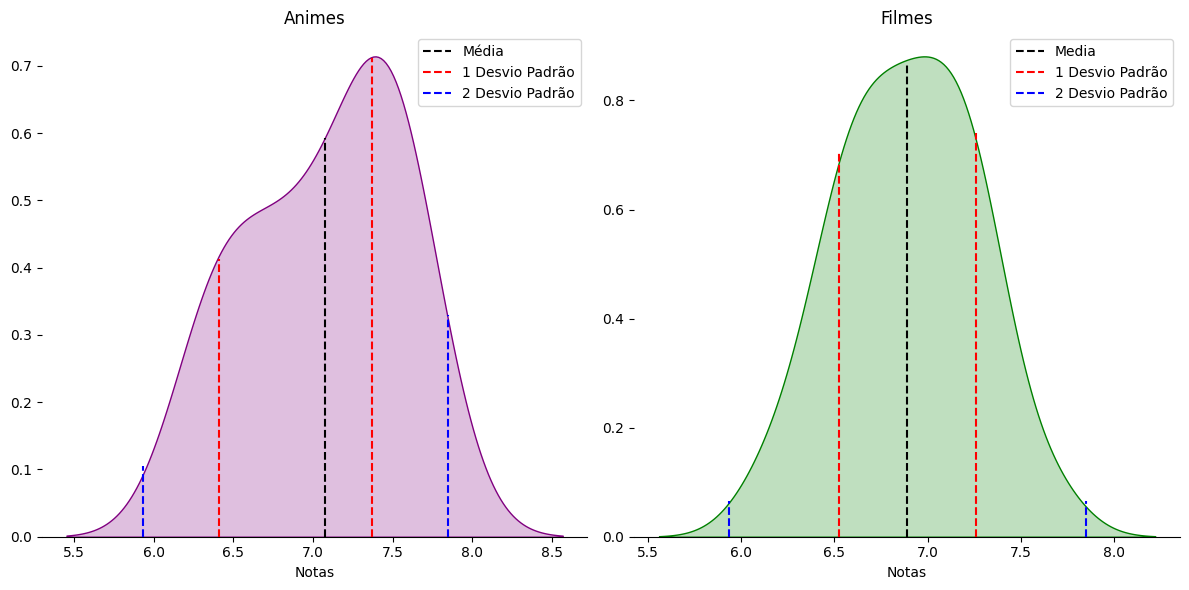

In [7]:
plt.figure(figsize=(12,6)) # Tamanho da figura

plt.subplot(1, 2, 1) # Criamos dois gráficos lado a lado. Esse é referente ao gráfico à esquerda.
sns.kdeplot(data=animes_tv, x='score', color='purple', fill=True) # função pra criar o gráfico de sino
plt.grid(False) # apagar as linhas do fundo
plt.axvline(mediat, ymax=0.79, color='black', linestyle='--', label='Média') # função pra colocar linha da média
plt.axvline(mediaf + dpa, ymax=0.95, color='red', linestyle='--', label='1 Desvio Padrão') # função pra colocar linha do primeiro desvio padrão
plt.axvline(mediaf - dpa, ymax=0.55, color='red', linestyle='--')
plt.axvline(mediaf + (2.0 * dpa), ymax=0.44, color='blue', linestyle='--', label='2 Desvio Padrão') # segundo desvio padrão
plt.axvline(mediaf - (2.0 * dpa), ymax=0.14, color='blue', linestyle='--')
plt.legend()
plt.title("Animes") # título
plt.xlabel("Notas") # nome para o eixo x
plt.ylabel('')

plt.subplot(1, 2, 2) # Esse é referente ao gráfico à direita.
sns.kdeplot(data=animes_movies, x='score', color='green', fill=True) # função pra criar o gráfico de sino
plt.grid(False) # apagar as linhas do fundo
plt.axvline(mediaf, ymax=0.94, color='black', linestyle='--', label='Media') # função pra colocar linha da média
plt.axvline(mediaf + dpf, ymax=0.8, color='red', linestyle='--', label='1 Desvio Padrão') # função pra colocar linha do primeiro desvio padrão
plt.axvline(mediaf - dpf, ymax=0.76, color='red', linestyle='--')
plt.axvline(mediaf + (2.0 * dpa), ymax=0.070, color='blue', linestyle='--', label='2 Desvio Padrão') # segundo desvio padrão
plt.axvline(mediaf - (2.0 * dpa), ymax=0.070, color='blue', linestyle='--')
plt.legend()
plt.title("Filmes") # título
plt.xlabel("Notas") # nome para o eixo x
plt.ylabel('')

sns.despine(left=True) # apagar a linha lateral que fica à esquerda
plt.tight_layout() # ajustar a posição dos dois gráficos
plt.show() # mostrar gráficos

Para a função dos gráficos, passamos como parâmetros as variáveis referente às séries de tv animada e aos filmes, no primeiro e segundo gráfico, respectivamente. Além disso, usamos como eixo x a coluna 'score' em ambas e escolhemos a cor para cada um.

Sobre o gráfico de sino dos animes, ele possui uma média de 7.07 e um desvio padrão de 0.46. De acordo com a regra 68-95-99,7, cerca de 68% dos dados estão dentro da área entre o primeiro desvio padrão, ou seja, mais da metade das temporadas possui uma nota entre, aproximadamente, 6.4 e 7.4. O mesmo vale para os filmes, que possui uma média de 6.89 e um desvio padrão de 0.36, tendo mais da metade sido avaliado com uma nota entre, aproximadamente, 6.5 e 7.3. 

Tendo noção de como estão distribuídas as notas de cada um, vamos agora avaliar o top 5 séries animadas e top 5 filmes mais bem avaliadas pela comunidade. Iremos fazer isso através do gráfico de barras. Primeiro, as séries animadas.

### Gráfico de Barras

In [42]:
quantMinima = 50000 # quantidade mínimas de pessoas
top5 = animes_tv[animes_tv['scored_by'] >= quantMinima] # tabela filtrada

Se olharmos a tabela da variável "animes_tv", vemos que a coluna 'scored_by' possui uma discrepância muito grande, pois quanto maior a quantidade de pessoas, mais influência ocorrerá sobre o 'score'. Portanto, no código acima, estamos delimitando uma quantidade mínima de pessoas que tenham avaliado aquela temporada, que nesse caso será 50 mil pessoas. Tendo delimitado essa quantidade, criamos uma nova variável com a tabela filtrada para somente aquelas temporadas que foram avaliadas por, pelo menos, 50 mil pessoas.

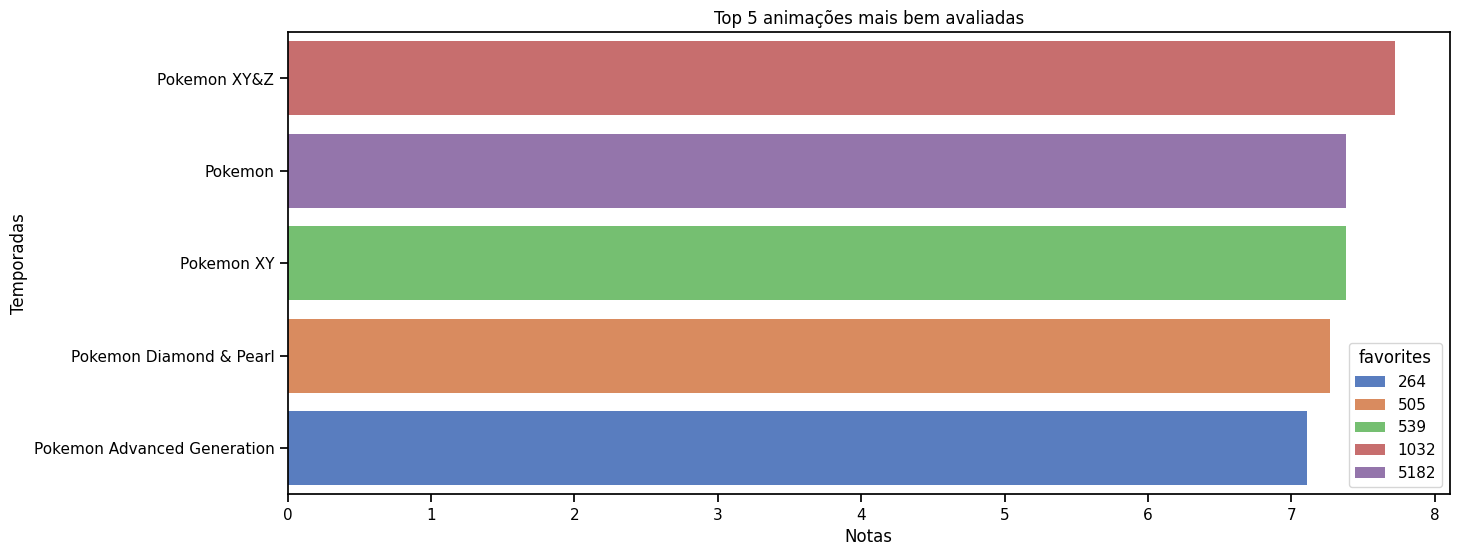

In [43]:
top5 = top5.sort_values(by='score', ascending=False) # Ordenando a tabela pela nota em ordem decrescente
plt.figure(figsize=(15, 6)) # tamanho do gráfico 
sns.barplot(data=top5[:5], x='score', y='title', hue='favorites', palette='muted') # função para criar o gráfico de barra
plt.title("Top 5 animações mais bem avaliadas") # título
plt.xlabel("Notas") # nome para o eixo x
plt.ylabel("Temporadas") # nome para o eixo y
plt.show() # mostra gráfico

Para a montagem do nosso gráfico, usamos como parâmetro a nova variável utilizada para as temporadas que atingiram a quantidade mínima de votantes, porém, somente os 5 primeiros índices (linhas). Em seguida, usamos como eixo x as notas ('score') e no eixo y os títulos ('title'). Foi escolhido o gráfico de barras horizontal porque fica mais fácil de visualizar a qual temporada cada barra se refere. Ademais, passsamos como parâmetro "hue" a coluna de favoritos ('favorites'), que se refere à quantas pessoas favoritaram tal temporada.

Analisando o gráfico, temos como primeiro colocado:

    A temporada "Pokemon XY&Z", que refere-se à terceira temporada da saga "Pokémon XY", lançada em 2015 e adaptando a sexta geração da franquia. XY&Z ficou em primeiro lugar com uma nota de 7.72 e tendo sido favoritado por 1032 pessoas.

Em segundo colocado:
    
    A primeira temporada da franquia, onde tudo começa, Pokémon!, lançada em 1997 e adaptando a primeira e segunda geração dos jogos para console. Pokémon ficou em segundo lugar com uma nota de 7.38 e tendo sido favoritado por 5182 pessoas! 

Em terceiro colocado: 

    A primeira temporada da saga "XY", Pokémon XY!, lançada em 2013 e adaptando, também, a sexta geração da franquia. Junto com o segundo colocado, XY obteve 7.38 de nota e foi favoritado por 539 pessoas.

Em quarto colocado:

    Temos a saga Pokémon Diamond & Pearl!, lançada em 2006 e adaptando a quarta geração da franquia. Diamond & Pearl obteve uma nota geral de 7.27 e foi favoritado por 505 pessoas.

Em quinto colocado:

    Pokémon Advanced Generation!, lançada em 2002 e adaptando a terceira geração de Franquia, "Ruby and Sapphire". Advanced Generation obteve uma nota de 7.11 e foi favoritado por 264 pessoas.

Olhando pro resultado, podemos afirmar que o público gosta bastante das primeiras gerações animadas, pois temos a primeira, segunda, terceira e quarta geração dentro do top 5. Também podemos dizer que a saga XY agrada à muitos.

Agora vamos analisar o top 5 dos filmes.

### Gráfico de Barras

In [44]:
animes_movies['title'] = animes_movies['title_english'] # troca o nome do título em romanji para o título em inglês
quantmin = 50000
top_movies = animes_movies[animes_movies['scored_by'] >= quantmin]

Na primeira linha de código, fizemos uma troca de título para ficar melhor de visualizar. Trocamos o título original em _romanji_ pelo título oficial em inglês. De resto, aplicamos o mesmo método da quantidade mínima de votantes, 50 mil, para o top 5 dos filmes.

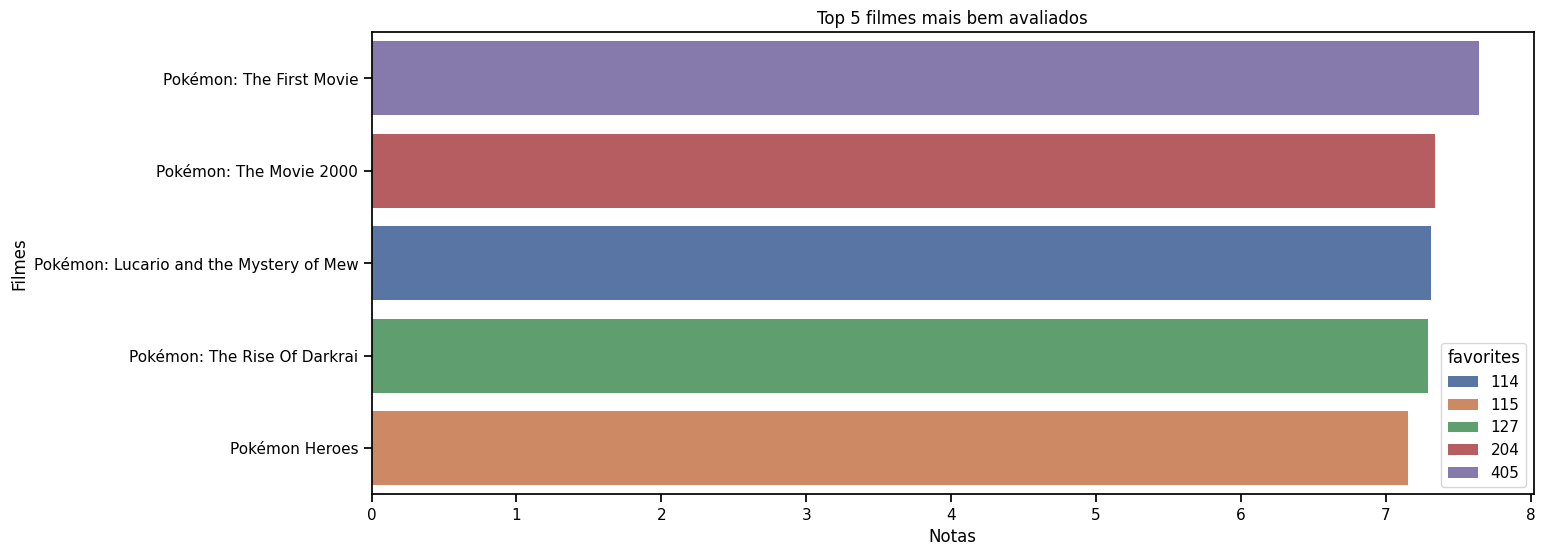

In [45]:
top_movies = top_movies.sort_values(by='score', ascending=False) # ordenando por nota em ordem decrescente
plt.figure(figsize=(15, 6)) # tamanho da figura
sns.barplot(data=top_movies[:5], x='score', y='title', hue='favorites', palette='deep') # função pra criar o gráfico
plt.title("Top 5 filmes mais bem avaliados") # título
plt.xlabel("Notas") # nome pro eixo x
plt.ylabel("Filmes") # nome pro eixo y
plt.show() # mostrar gráfico

Utilizando a mesma ideia que o gráfico anterior, fizemos um top 5 filmes na qual passamos como parâmetro: a variável armazenando os filmes que foram avaliados por, pelo menos 50 mil pessoas, notas como eixo x e título do filme como eixo y, para melhor visualização e também passamos os favoritos como "hue".

Analisando o gráfico temos como primeiro colocado:

    Pokémon: The first Movie!. O primeiro filme da franquia, lançado no ano de 1998 nele somos apresentados ao primeiro pokémon lendário da franquia, o Mewtwo. The first movie obteve uma nota de 7.64 e foi favoritado por 405 pessoas.

Em segundo colocado:

    Pokémon: The movie 2000. Lançado em 1999, é o segundo filme da franquia. Nele somos apresentado ao segundo pokémon lendário, Lugia. O filme recebeu uma nota de 7.34 e foi favoritado por 204 pessoas.

Em terceiro colocado:

    Pokémon: Lucário and the Mystery of Mew. Lançado em 2005, é o oitavo filme da franquia e também o primeiro a não ter uma história centrada em um pokémon lendário. Esse filme obteve uma nota de 7.31 e foi favoritado por 114 pessoas.

Em quarto colocado:

    Pokémon: The Rise of Darkrai. O décimo filme da franquia, lançado no ano de 2007. É o filme que marcou por ter alcançado 50 bilhões de ienes em bilheteria, somando todas bilheterias anteriores. Nele somos apresentados ao lendário, Darkrai. O filme recebeu uma nota de 7.29 e foi favoritado por 127 pessoas.

Em quinto colocado:

    Pokémon Heroes. lançado em 2002, é o quinto filme da franquia. Nele somos apresentados ao pokémon lendário Latios. Pokémon Heroes obteve uma nota de 7.15 e foi favoritado por 204 pessoas.

Avaliando os resultados, temos o primeiro filme como o favorito de boa parte da comunidade. Ademais, podemos dizer que os 10 primeiros filmes foram até que muito bem recebido pelo público, pois todos obtiveram nota 7 ou próximo.

Isso fica muito mais óbvio analisando à bilheteria de cada filme.

### Gráfico de Linha

In [10]:
poke_movies = animes_movies.filter(items=['title', 'score', 'favorites', 'start_year']) # filtra a tabela

In [11]:
poke_movies = poke_movies.sort_values(by='start_year', ascending=True) # ordena a tabela

Nos dois códigos acima, criamos uma nova variável para armazenar somente certas colunas referente aos filmes de Pokémon. Essas colunas foram: O título, a nota, a quantidade de favoritos e o ano lançado. Em seguida, ordenamos essa nova varíavel através da coluna 'start_year' em ordem crescente.

In [13]:
box_office = [7.6, 6.4, 6.4, 3.9, 2.67, 4.5, 4.38, 4.3, 3.4, 5.02, 4.8, 4.67, 4.16, 4.33,
              4.33, 3.61, 3.17, 2.91, 2.61, 2.15, 3.55, 3.09, 2.98, 2.02] # Bilheteria de cada filme

indice = [643, 1268, 2029, 2536, 2034, 3266, 2549, 1582, 3223, 1640, 2888, 2570, 3087, 4046,
         4262, 4776, 5284, 4750, 4261, 4452, 2539, 2769, 6590, 2987] # Indice das linhas

for i in range(len(box_office)): # Função pra adicionar a bilheteria pra cada filme correspondente
    filme = indice[i]
    bilheteria = box_office[i]
    poke_movies.loc[filme, 'gross'] = bilheteria

Agora criamos duas listas, uma chamada 'box_office' que contém números floats que representam a bilheteria de cada filme e uma chamada 'indice' que refere-se à linha de cada filme na variável "poke_movies". Em seguida aplicamos um loop para criar-se uma nova coluna na tabela chamada de 'gross' e para adicionar a bilheteria de cada filme correspondente.

Agora vamos demonstrar como foi a bilheteria dos filmes no cinemas japoneses com o passar dos anos.

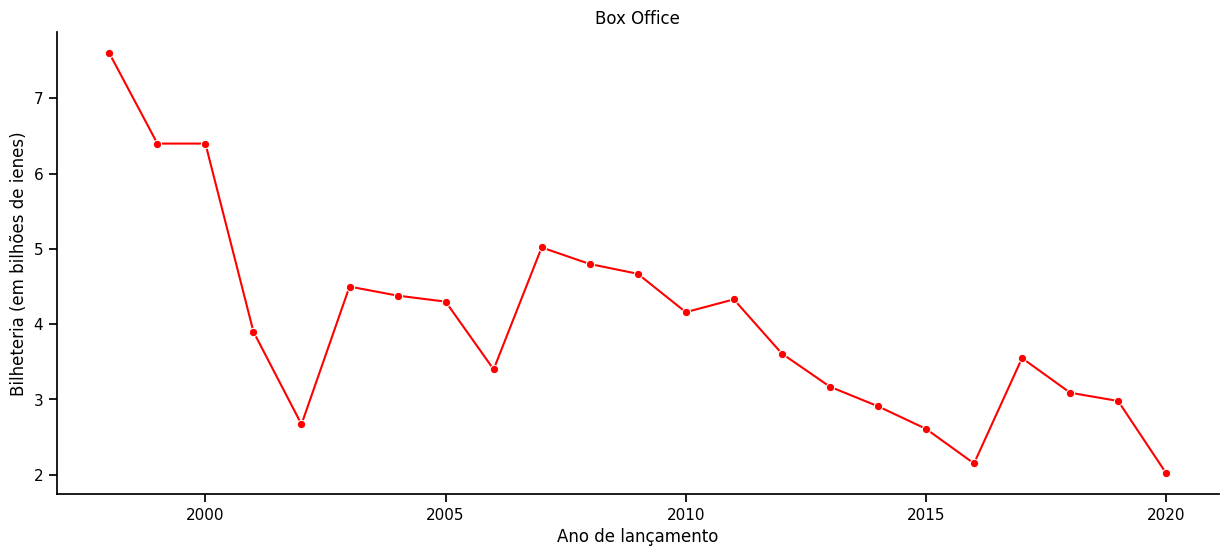

In [49]:
plt.figure(figsize=(15, 6)) # tamanho da figura
sns.lineplot(data=poke_movies, x='start_year', y='gross', marker='o', color='red') # função pra criar o gráfico do lineplot
sns.despine() # remover as linhas do limite superior e à direita
plt.title("Box Office") # título
plt.xlabel("Ano de lançamento") # nome pro eixo x
plt.ylabel("Bilheteria (em bilhões de ienes)") # nome pro eixo y
plt.show() # mostrar gráfico

Para criar o gráfico de linha usamos a nova variável criada como o data, além disso, declaramos a coluna 'start_year' como o eixo x e a nova coluna criada, 'gross', como eixo y. Ademais, também foi acrescentado o marker 'o' para representar cada filme.

Analisando o gráfico, vemos que o pico de bilheteria foi no primeiro filme, lançado no ano de 1998, com mais de 7 bilhões de Ienes arrecadados, um feito que perdurou o filme dentro do "Top 100 filmes japoneses de maiores bilheterias" por muitos anos. Após isso, podemos notar que, com o decorrer dos anos, o Box Office dos filmes forem decaindo chegando até 2 bilhões de Ienes, no último filme lançado em 2020, Pokémon: Secret of The Jungle. Entretanto, como podemos dizer quais filmes renderam bem? Pra isso, vamos passar uma reta no gráfico representando a média de bilheteria.

### Gráfico de Linha

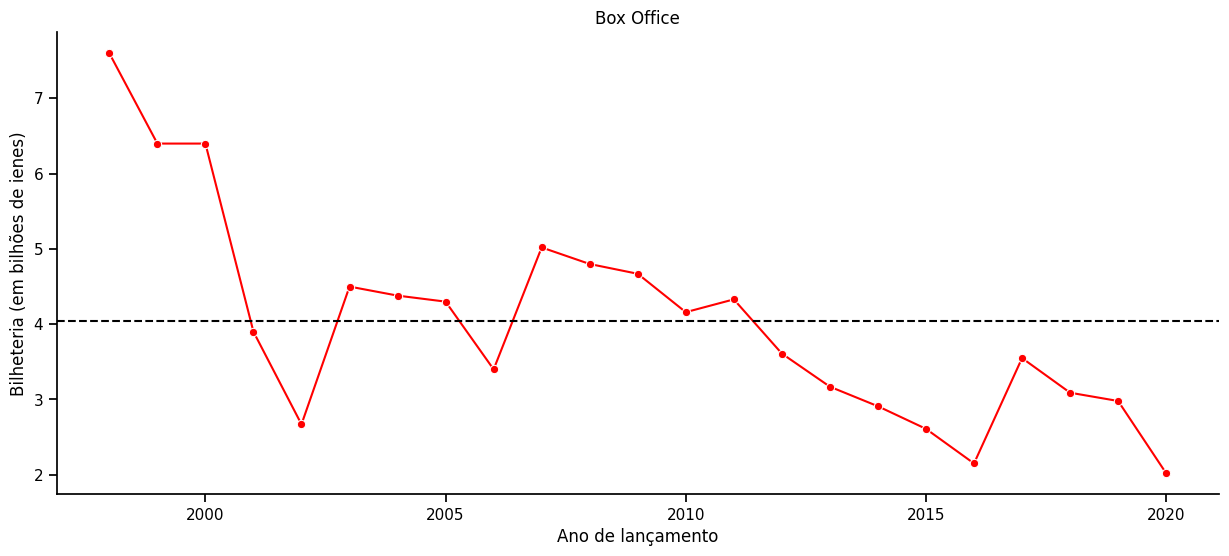

In [50]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=poke_movies, x='start_year', y='gross', marker='o', color='red')
sns.despine()
plt.axhline(y=poke_movies['gross'].mean(), color='black', linestyle='--', label=f'Média Geral de Bilheteria') # Adicionado linha representando a média
plt.title("Box Office")
plt.xlabel("Ano de lançamento")
plt.ylabel("Bilheteria (em bilhões de ienes)")
plt.show()

Com uma média de mais ou menos 4 bilhões de ienes, temos uma reta traçejada. Avaliando por ela, podemos enxergar que uma boa quantidade de filmes estão acima da média, incluindo 7 dos 10 primeiros filmes lançados. Podemos dizer, também, que a maior queda de bilheteria foi entre o terceiro e o quarto filme.

Mas, a próposito, existe alguma correlação entre a nota do público e a bilheteria japonesa arrecadada?

### Gráfico de Calor

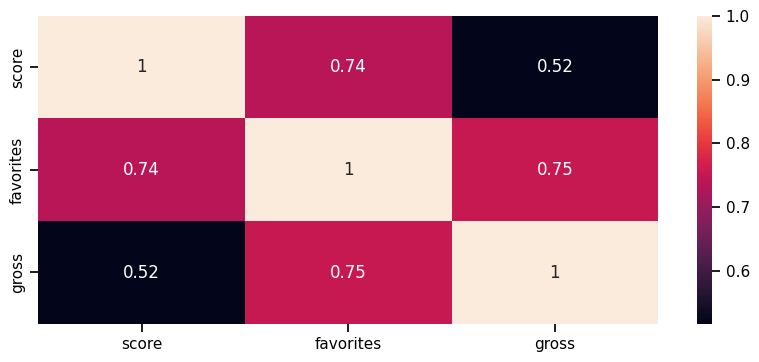

In [51]:
scr_grs = poke_movies[['score', 'favorites', 'gross']] # armazenando as colunas a serem utilizadas
data_corr = scr_grs.corr() # fazendo a correlação entre cada coluna
plt.figure(figsize=(10, 4)) # tamanho da figura
sns.heatmap(data_corr, annot=True) # função pra criar o heatmap
plt.show() # mostra gráfico

Criamos uma nova variável que receberá apenas as colunas de favoritos, score e gross do gráfico anterior. Com isso, chamamos a função '.corr()' pra fazer a correlação das colunas entre si e salvando-as numa nova variável. Por fim, criamos um gráfico de calor para demonstrar essa correlação.

Podemos enxergar, claramente, que há uma forte correlação entre as notas dos filmes ('score') e a quantidade de favoritos ('favorites') e também entre favoritos e a bilheteria ('gross'). Já entre as notas e a bilheteria temos uma correlação mediana, de 0.52, o que diz que a bilheteria arrecadada acaba não influênciando muito nas notas da comunidade global.

Com isso, também podemos formar um grupo com o K-Means.

### Gráfico de Dispersão

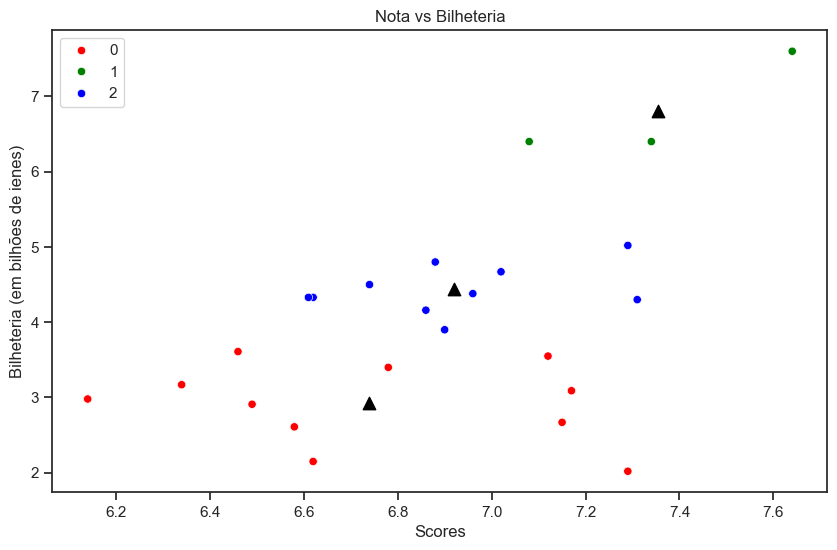

In [14]:
colors = ['red', 'green', 'blue'] # cores para os grupos
df_group = poke_movies[['score', 'gross']] # colunas que serão usados pra avaliar a dispersão

kmeans = KMeans(n_clusters=3, n_init=10, random_state=42) # definindo a quantidade de grupos
kmeans.fit(df_group) # máscara

sns.set(style='ticks') # estilo da figura
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_group, x='score', y='gross', hue=kmeans.labels_, palette=colors) # função pra criar o gráfico de dispersão
centroids = kmeans.cluster_centers_ # definindo os centroids
plt.scatter(centroids[:,0], centroids[:,1], s=80, marker='^', color='black') # função pra centralizar os centroids
plt.grid(False) # remover as linhas de background

plt.title("Nota vs Bilheteria") # título
plt.xlabel("Scores") # nome pro eixo x
plt.ylabel("Bilheteria (em bilhões de ienes)") # nome pro eixo y
plt.show() # Mostrar gráfico

Para aplicar agrupamento, primeiro determinamos as cores que queremos para cada grupo e em seguida armazenamos as colunas necessárias em uma variável. Depois disso, determinamos a quantidade de grupo e definimos os gráficos para criar o scatterplot entre as colunas e outro para colocar os centroids em cada grupo.

Analisando os agrupamento, podemos definir um grupo de maneira bem distinta, o grupo 1. Podemos dizer que eles são os filmes que obtiveram um bom faturamento e uma boa avaliação pela comunidade. O grupo 2 está mais ao centro da figura e é o que possui mais filmes. Quase todos tiveram um faturamento entre 4 e 5 bilhões de ienes, entretanto, tendo uma maior considerável variação nas notas da comunidade. No grupo 0, na cor vermelha, temos o grupo que possui a maior variação nas notas dos filmes e com uma bilheteria arrecadada entre 3 e 4 bilhões de ienes. Já no grupo 3, temos os filmes que arrecadaram menos de 3 bilhões de ienes, não sendo considerado uma boa bilheteria em relação aos outros filmes, e com variaçâo bem notável na nota.

## 3. Quantos pokémon existem em cada geração e em cada tipo?

#### Função para criar o Barplot para a visualização:

Primeiro, criemos uma função para determinar um gráfico de barras que demonstre a Quantidade de Pokémon por grupo formado e determine uma Média entre esses grupos.

In [12]:
def Barplot(data, column, size_x, size_y, eixo_x, eixo_y, title):
    
    contagem = data[column].value_counts() # Conta a quantidade de Pokémon em cada grupo formado.
    media = np.mean(data.groupby(column).size()) # Calcula a média dos Pokémon dos grupos formados.
   
    plt.figure(figsize=(size_x, size_y)) # Define o tamanho do gráfico.
    sns.barplot(x=contagem.index, y=contagem.values, palette="bright") # Gera  o gráfico com as informações obtidas.
    
    plt.xlabel(eixo_x) # Define o nome do eixo X.
    plt.ylabel(eixo_y) # Define o nome do eixo Y.
    plt.title(title)   # Define o título do gráfico.
    
    plt.axhline(media, color='r', linestyle='--', linewidth=2) # Gera a linha da média obtida anteriormente no gráfico.

### 3.1. Quantos Pokémon Existem por Geração?
Vamos analisar de Geração em Geração, da primeira à nona, a quantidade de ocorrências do mesmo número na coluna 'Gen' para identificar a quantidade de Pokémon presente por geração.

In [21]:
pokemon_gen = data_st['Gen'].value_counts()
for i in range(1, 10):
    n_pokemon = pokemon_gen.get(i, 0)
    print(f"Geração {i}: {n_pokemon} Pokémon")
print(f"Média de Pokémon por Geração: {np.mean(pokemon_gen):.2f}")

Geração 1: 151 Pokémon
Geração 2: 99 Pokémon
Geração 3: 135 Pokémon
Geração 4: 107 Pokémon
Geração 5: 156 Pokémon
Geração 6: 72 Pokémon
Geração 7: 88 Pokémon
Geração 8: 96 Pokémon
Geração 9: 126 Pokémon
Média de Pokémon por Geração: 114.44


### Gráfico de Barras

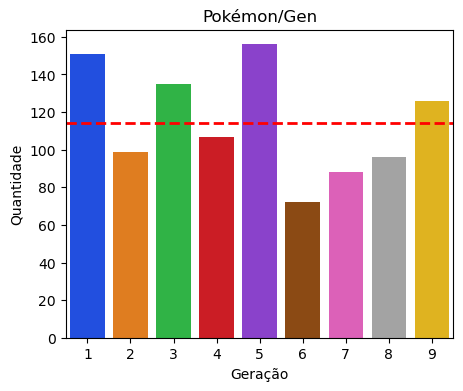

In [15]:
Barplot(data_st, 'Gen', 5,  4, 'Geração', 'Quantidade', 'Pokémon/Gen')

Com isso, podemos chegar na conclusão que: 

- A quinta geração é aquela que apresenta a maior quantidade de Pokémon únicos, existindo 156 Pokémon em tal geração.
- A sexta geração é aquela que apresenta a menor quantidade de Pokémon únicos, existindo 72 Pokémon em tal geração.
- Apenas as gerações 1, 3, 5 e 9 estão acima da média de quantidade de Pokémon.
- As gerações 2, 4, 6, 7 e 8 estão abaixo da média de quantidade de Pokémon.

### 3.2. Quantos Pokémon Existem por Tipo?

Primeiramente, devemos ter a noção de que há duas formas de Pokémon quando falamos sobre tipagem, Aqueles que possuem Um único Tipo e aqueles que possuem Dois Tipos.

- Um Tipo: Também chamado de 'Monotype', possuem apenas um tipo em sua composição, como exemplo, temos o Pokémon mais famoso da Franquia, o Pikachu, tipo Elétrico.
- Dois Tipos: São Pokémon separados entre dois tipos, sendo o Tipo Principal e Tipo Secundário, como exemplo temos o Pokémon mais amado da comunidade, Charizard, sendo do tipo Fogo como principal e Voador como secundário.

### 3.2.1 Quantidade por Tipo Principal

Primeiro, vamos analisar quantos Pokémon existem por tipo principal, vamos utilizar o mesmo método adotado para analisar a quantidade de Pokémon por geração:

In [26]:
pokemon_tipo = data_st['Type1'].value_counts()
tipos = ('Normal', 'Fire', 'Water', 'Grass', 'Flying', 'Fighting', 'Poison', 'Electric', 'Ground', 'Rock', 'Psychic', 'Ice', 'Bug', 'Ghost', 'Steel', 'Dragon','Dark', 'Fairy')
for i in tipos:
    n_pokemon = pokemon_tipo.get(i, 0)
    print(f"Tipo {i}: {n_pokemon} Pokémon")
print(f"Média de Pokémon por Tipo: {np.mean(pokemon_tipo):.2f}")

Tipo Normal: 120 Pokémon
Tipo Fire: 66 Pokémon
Tipo Water: 133 Pokémon
Tipo Grass: 106 Pokémon
Tipo Flying: 9 Pokémon
Tipo Fighting: 40 Pokémon
Tipo Poison: 43 Pokémon
Tipo Electric: 59 Pokémon
Tipo Ground: 40 Pokémon
Tipo Rock: 58 Pokémon
Tipo Psychic: 60 Pokémon
Tipo Ice: 31 Pokémon
Tipo Bug: 83 Pokémon
Tipo Ghost: 35 Pokémon
Tipo Steel: 36 Pokémon
Tipo Dragon: 37 Pokémon
Tipo Dark: 45 Pokémon
Tipo Fairy: 29 Pokémon
Média de Pokémon por Tipo: 57.22


### Gráfico de Barras

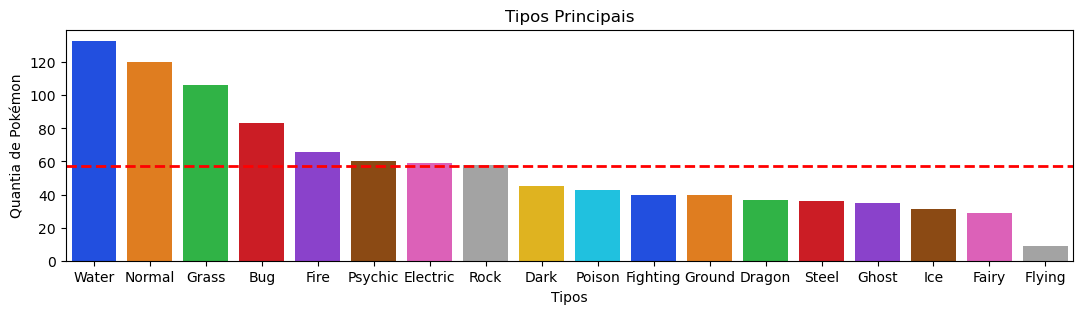

In [23]:
Barplot(data_st, 'Type1', 13, 3, 'Tipos', 'Quantia de Pokémon', 'Tipos Principais')

Com isso, concluímos que:

- O Tipo água é o tipo que mais possui representantes em tipo Principal, com 133 Pokémon.
- O Tipo Voador é o tipo que menos possui representantes em tipo Principal, com 9 Pokémon.
- Apenas os Tipos Pedra, Elétrico, Psíquico, Fogo, Inseto, Grama, Normal e Água estão acima da média em quantidade de Pokémon.
- Os Tipos Sombrio, Venenoso, Lutador, Terra, Dragão, Metal, Fantasma, Gelo, Fada e Voador estão abaixo da média em quantidade de Pokémon.

### 3.2.2 Quantidade por Tipo Secundário

Agora, veremos como é distribuído a quantidade de Pokémon em Tipo Secundário:

In [28]:
pokemon_tipo2 = data_st['Type2'].value_counts()
tipos = ('Monotype', 'Normal', 'Fire', 'Water', 'Grass', 'Flying', 'Fighting', 'Poison', 'Electric', 'Ground', 'Rock', 'Psychic', 'Ice', 'Bug', 'Ghost', 'Steel', 'Dragon','Dark', 'Fairy')
for i in tipos:
    n_pokemon = pokemon_tipo2.get(i, 0)
    print(f"Tipo {i}: {n_pokemon} Pokémon")
print(f"Média de Pokémon por Tipo: {np.mean(pokemon_tipo2):.2f}")

Tipo Monotype: 501 Pokémon
Tipo Normal: 13 Pokémon
Tipo Fire: 16 Pokémon
Tipo Water: 21 Pokémon
Tipo Grass: 24 Pokémon
Tipo Flying: 100 Pokémon
Tipo Fighting: 33 Pokémon
Tipo Poison: 41 Pokémon
Tipo Electric: 10 Pokémon
Tipo Ground: 35 Pokémon
Tipo Rock: 17 Pokémon
Tipo Psychic: 42 Pokémon
Tipo Ice: 17 Pokémon
Tipo Bug: 9 Pokémon
Tipo Ghost: 30 Pokémon
Tipo Steel: 29 Pokémon
Tipo Dragon: 33 Pokémon
Tipo Dark: 24 Pokémon
Tipo Fairy: 35 Pokémon
Média de Pokémon por Tipo: 54.21


### Gráfico de Barras

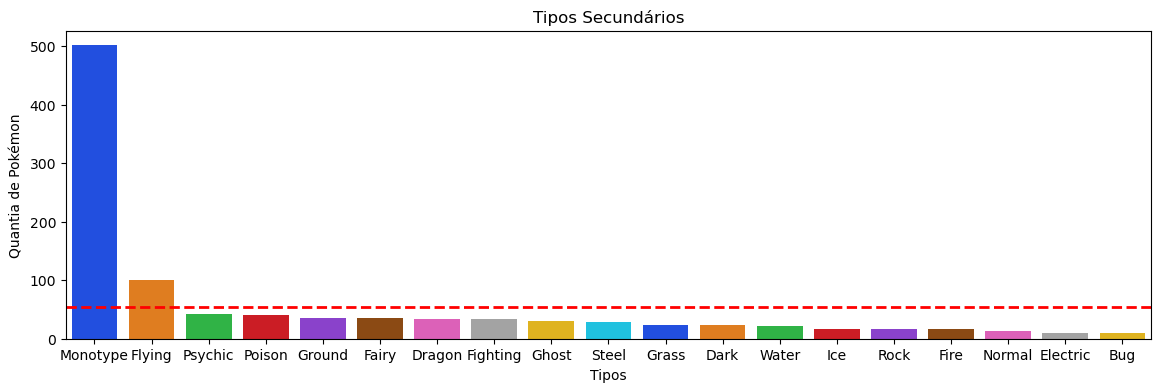

In [30]:
Barplot(data_st, 'Type2', 14, 4, 'Tipos', 'Quantia de Pokémon', 'Tipos Secundários')

Com isso, concluímos que:

- Existem muito mais Pokémon com um único tipo do que qualquer outro Tipo Secundário, em que há 501 representantes.

Mas para termos conclusões mais evidentes sobre os Pokémon e seu Tipo Secundário, vamos criar um novo dataframe sem o valor 'Monotype', para filtrar apenas os Pokémon que possuem Tipo Secundário.

In [34]:
double_type = data_st[data_st['Type2'] != 'Monotype']
pokemon_tipo22 = double_type['Type2'].value_counts()
tipos = ('Normal', 'Fire', 'Water', 'Grass', 'Flying', 'Fighting', 'Poison', 'Electric', 'Ground', 'Rock', 'Psychic', 'Ice', 'Bug', 'Ghost', 'Steel', 'Dragon','Dark', 'Fairy')
for i in tipos:
    n_pokemon = pokemon_tipo22.get(i, 0)
    print(f"Tipo {i}: {n_pokemon} Pokémon")
print(f"Média de Pokémon por Tipo: {np.mean(pokemon_tipo22):.2f}")

Tipo Normal: 13 Pokémon
Tipo Fire: 16 Pokémon
Tipo Water: 21 Pokémon
Tipo Grass: 24 Pokémon
Tipo Flying: 100 Pokémon
Tipo Fighting: 33 Pokémon
Tipo Poison: 41 Pokémon
Tipo Electric: 10 Pokémon
Tipo Ground: 35 Pokémon
Tipo Rock: 17 Pokémon
Tipo Psychic: 42 Pokémon
Tipo Ice: 17 Pokémon
Tipo Bug: 9 Pokémon
Tipo Ghost: 30 Pokémon
Tipo Steel: 29 Pokémon
Tipo Dragon: 33 Pokémon
Tipo Dark: 24 Pokémon
Tipo Fairy: 35 Pokémon
Média de Pokémon por Tipo: 29.39


### Gráfico de Barras

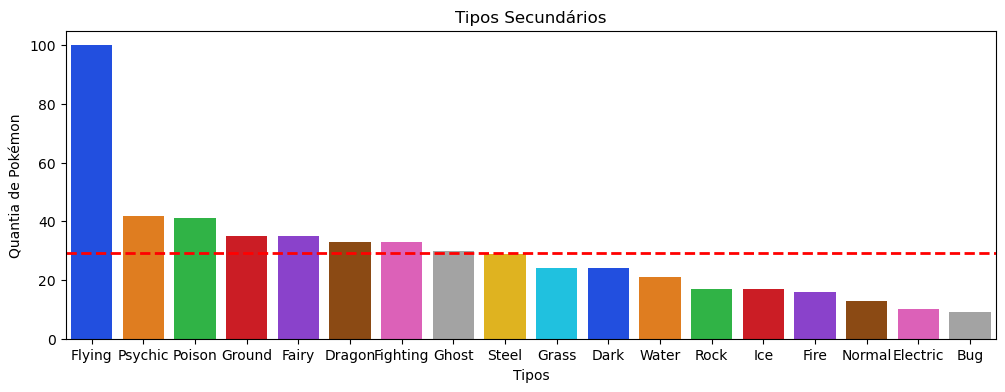

In [31]:
Barplot(double_type, 'Type2', 12, 4, 'Tipos', 'Quantia de Pokémon', 'Tipos Secundários')

Agora, vamos analisar o que podemos retirar desse gráfico:

- O tipo voador, aquele que possui menos representantes como Tipo Principal, é o que possui mais Pokémon como tipo secundário, com o total de 100 Pokémon.
- O tipo inseto é o que menos possui representantes como tipo secundário, possuindo apenas 9 Pokémon.
- O tipo água, que é o tipo com maior número de quantidade principal, aqui fica em 12º Lugar, atrás do tipo Sombrio.

## 3.2.3 Combinações de Tipo

Após algumas análises, temos a quantidade de Pokémon diferenciado por tipo primário e de tipo secundário, mas e a combinação entre eles? Quantos Pokémon existem por combinações de Tipo Primário com Secundário? É o que vamos ver com o gráfico em Heatmap a seguir: 

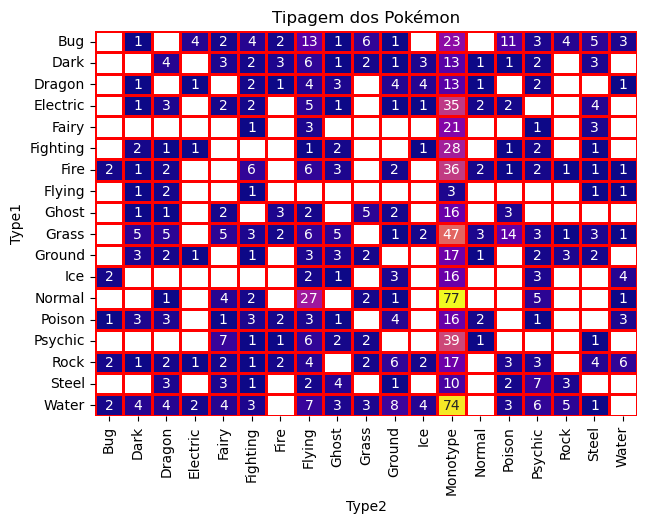

In [35]:
data_double_type = data_st.groupby(['Type1', 'Type2'])

plt.figure(figsize=(7, 5))
sns.heatmap(data_double_type.size().unstack(), cmap='plasma', linewidths=1, cbar=False, linecolor='red', annot=True)
plt.title('Tipagem dos Pokémon')
plt.show()

Agpra podemos tirar conclusões definitivas sobre a quantidade de Pokémon existente por combinação dos Tipos.

- A combinação mais frequente de Tipagem é a Normal e Voador, com 27 representantes
- Em segundo lugar, temos a Inseto e Voador, com 14 Pokémon distintos
- Analisando o gráfico, fica notório que os Pokémon Monotype são muito mais frequentes, em média, do que os que possuem dupla tipagem.

## 4. Quais são os 10 pokémon mais fortes, estatisticamente?

Para encontrar o Pokémon mais forte, estatisticamente, primeiro vamos analisar a soma das estatísticas gerais dos Pokémon e organizá-los de forma decrescente.

In [38]:
data_top = data_st.sort_values(by='Total', ascending=False)
data_top = data_top.iloc[:10]
print(f"{data_top[['Name', 'Total']]}")

                        Name  Total
606                   Arceus    720
1224  Terapagos Stellar Form    700
1069               Eternatus    690
594                   Palkia    680
962                   Lunala    680
961                 Solgaleo    680
779                   Zekrom    680
778                 Reshiram    680
869                  Yveltal    680
198                   Mewtwo    680


Podemos ver que muitos Pokémon presentes no top estão com as estatísticas empatadas, nesse caso, vamos encontrar uma forma de desempatá-los de alguma forma e criar um pódio ideal.

Para fazer isso, vamos checar as estatísticas mais consistentes entre eles, ou seja, o que mais se distancia do desvio padrão para cima, ou seja, faremos um z-score de cada estatística dos Pokémon e vamos somá-las para criar o z-score definitivo.

In [55]:
data_zscore = data_st

def Z_score(stats, media, dp):
    return (stats - media) / dp

data_zscore['z-score'] = data_zscore['Total'].apply(lambda x: Z_score(x, data_zscore['Total'].mean(), data_zscore['Total'].std()))

stats = ('HP', 'Attack', 'Defense', 'SP_Attack', 'SP_Defense', 'Speed')

for i in stats:
    data_zscore[i] = data_zscore[i].apply(lambda x: Z_score(x, data_zscore[i].mean(), data_zscore[i].std()))

data_p = data_zscore[['HP', 'Attack', 'Defense', 'SP_Attack', 'SP_Defense', 'Speed']]
soma_linhas = data_p.sum(axis=1)

data_zscore['z-score'] = soma_linhas

data_zscore = data_zscore.sort_values(by='z-score', ascending=False)
data_zscore.iloc[:10]

,No,Name,Type1,Type2,Gen,HP,Attack,Defense,SP_Attack,SP_Defense,Speed,Total,z-score
606,493,Arceus,Normal,Monotype,4,1.858461,1.419680,1.619005,1.680358,1.861240,1.831407,720,10.270152
1224,1029,Terapagos Stellar Form,Normal,Monotype,9,3.354935,0.916432,1.277345,2.017399,1.486269,0.614048,700,9.666428
1069,890,Eternatus,Poison,Dragon,8,2.606698,0.245435,0.764855,2.522959,0.923812,2.179223,690,9.242982
598,487,Giratina,Ghost,Dragon,4,2.980816,0.748683,1.619005,1.006278,1.861240,0.787957,680,9.003979
311,249,Lugia,Psychic,Flying,2,1.334695,0.413184,1.960666,0.669238,3.136142,1.483590,680,8.997514
312,250,Ho-Oh,Fire,Flying,2,1.334695,1.755179,0.594025,1.343318,3.136142,0.787957,680,8.951315
962,792,Lunala,Psychic,Ghost,7,2.494462,1.184831,0.559858,2.253327,1.373778,1.031428,680,8.897685
961,791,Solgaleo,Psychic,Steel,7,2.494462,1.990028,1.174847,1.444430,0.698830,1.031428,680,8.834025
869,717,Yveltal,Dark,Flying,6,2.082932,1.788729,0.764855,2.051103,1.036304,1.100992,680,8.824913
868,716,Xerneas,Fairy,Monotype,6,2.082932,1.788729,0.764855,2.051103,1.036304,1.100992,680,8.824913


### Gráfico de Barras:

Text(0.5, 1.0, 'Top  10')

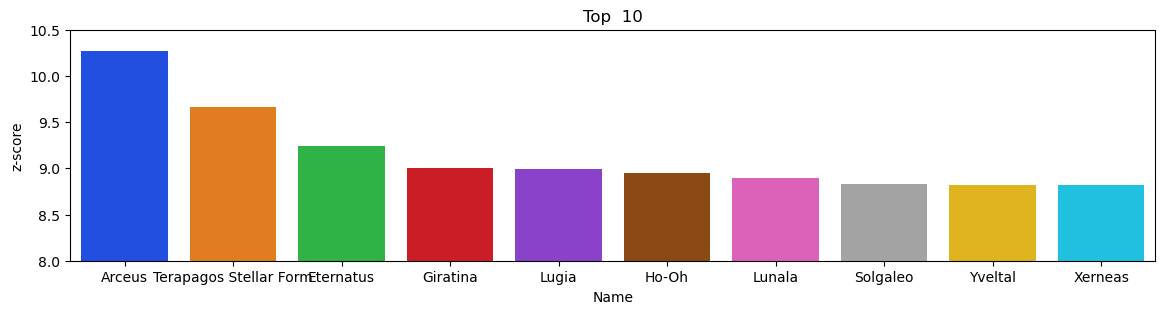

In [56]:
plt.figure(figsize=(14, 3))
plt.ylim(8, 10.5)
sns.barplot(data = data_zscore.iloc[:10], x  = 'Name', y = 'z-score', palette = 'bright')
plt.title('Top  10')

Agora podemos criar uma conclusão definitiva:

- Arceus é o Pokémon mais forte, estatisticamente
- Os Pokémon Yveltal e Xerneas são estatisticamente semelhantes, e coincidentemente ou não, pertecem a mesma geração e são lendários da mesma remessa de jogos.
- Os 10 Pokémon mais fortes são Lendários, demonstrando sua superioridade aos Pokémon ordinários. 

## 5. Qual a correlação entre o tipo dos pokémon e os seus stats? Existem tipos mais fortes que outros?

Agora, vamos criar uma função capaz de adquirir a média nos stats de cada tipo de pokémon e então criar um gráfico de dispersão para avaliar se há tipos mais fortes que outros em cada estatística existente.

In [57]:
def TopTipos (data, stats):
    
    media_stats_por_tipo = data.groupby('Type1')[stats].mean().reset_index() # Divide o dataframe em grupos formados pelo tipo
                                                                             # primário e calcula a média de cada grupo.

    media_stats_por_tipo = media_stats_por_tipo.sort_values(by=stats, ascending=False) # Organiza os tipos em ordem decrescente
                                                                                       # em relação aos stats.

    media_geral = data[stats].mean() # Calcula a média geral dos stats escolhidos.

    plt.figure(figsize=(6, 3)) # Define o tamanho do gráfico.
    sns.scatterplot(data=media_stats_por_tipo, x='Type1', y=stats) # Cria o gráfico de dispersão
    
    plt.axhline(y=media_geral, color='red', linestyle='--', label=f'Média Geral de {stats}') # Cria a linha da média geral
                                                                                             # dos stats.
    plt.xlabel('Tipos Primários') # Nomeia o eixo x.
    plt.ylabel(f"Média de {stats}") # Nomeia o eixo y.
    plt.title(f"Média de {stats} por Tipo Primário") # Nomeia o título do gráfico.
    plt.xticks(rotation=45) # Muda o ângulo que é exibido os tipos no eixo x para melhor visualização.

E então, vamos aplicar a função para todos as estatísticas e avaliar se há alguma relação entre a estatística e o tipo.

### Para HP:

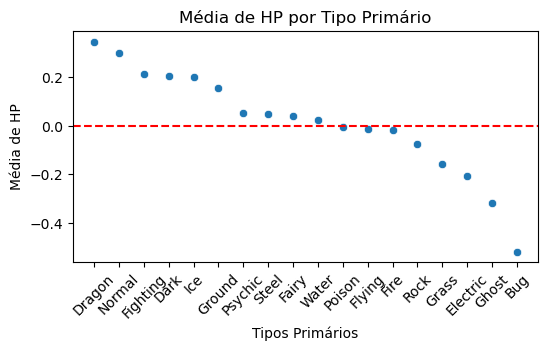

In [59]:
TopTipos(data_st, 'HP')

Portanto, sim, há Pokémon mais fortes que outros em estatísticas distintas, a seguir, vamos demonstrar os gráficos de cada estatística e no fim analisar o mais forte e o mais fraco em cada um.

### Para Ataque:

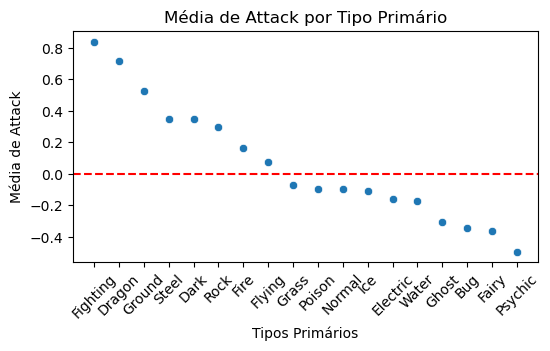

In [60]:
TopTipos(data_st, 'Attack')

### Para Defesa:

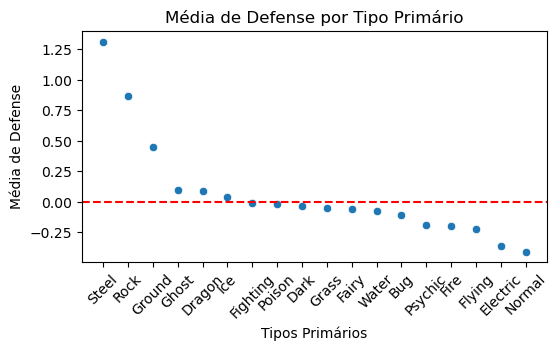

In [61]:
TopTipos(data_st, 'Defense')

### Para Ataque Especial:

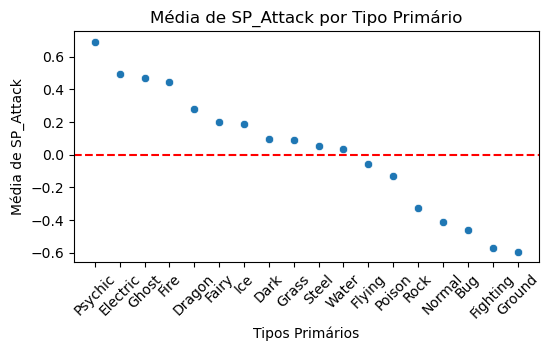

In [62]:
TopTipos(data_st, 'SP_Attack')

### Para Defesa Especial:

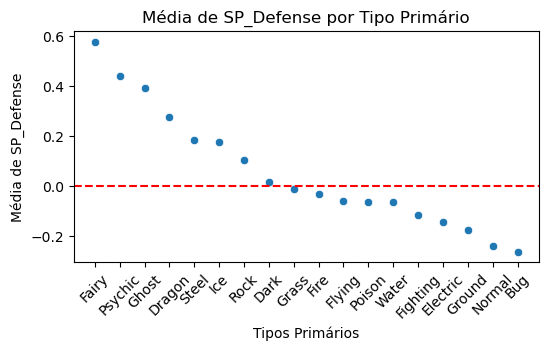

In [63]:
TopTipos(data_st, 'SP_Defense')

### Para Velocidade:

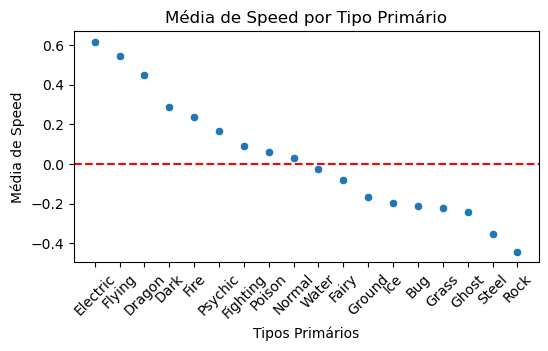

In [64]:
TopTipos(data_st, 'Speed')

### Para Z-Score:

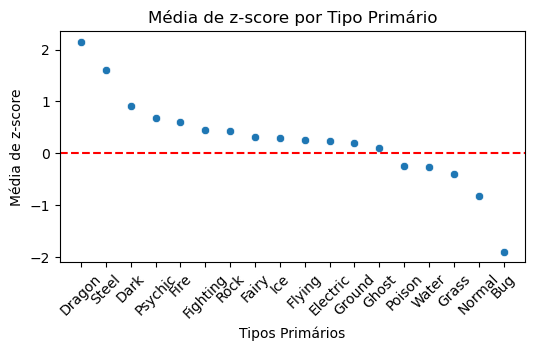

In [65]:
TopTipos(data_zscore, 'z-score')

Portanto, vamos analisar os gráficos em cada Stats:

- Para HP: 
    - Dragão é o que possui mais HP
    - Inseto é o que possui menos HP

- Para Ataque:
    - Lutador é o que possui mais Ataque
    - Psíquico é o que possui menos Ataque

- Para Defesa:
    - Metal é o que possui mais Defesa
    - Normal é o que possui menos Defesa

- Para Ataque Especial:
    - Psíquico é o que possui mais Ataque Especial
    - Terra é o que possui menos Ataque Especial

- Para Defesa Especial:
    - Fada é o que possui mais Defesa Especial
    - Inseto é o que possui menos Defesa Especial

- Para Velocidade:
    - Elétrico é o que possui mais Velocidade
    - Pedra é o que possui menos Velocidade

- Em questão de Z-Score:
    - Podemos concluir que o Tipo Dragão é o Tipo mais forte estatísticamente e Inseto é o tipo mais Fraco.
    
Portanto, é perceptível que o Tipo influencia nas estatísticas dos Pokémon, cada Tipo tendendo a alguma estatística diferente.

Mas... Sempre foi assim? Será que o tipo dragão permaneceu como o tipo mais Forte desde a primeira geração e permanece até hoje em dia? Vamos ver.

Antes de prosseguir, vamos definir as cores para cada tipo de pokémon para melhor visualização:

In [66]:
cores = {
    'Normal': '#A8A77A',
    'Fire': '#EE8130',
    'Water': '#6390F0',
    'Grass': '#7AC74C',
    'Electric': '#F7D02C',
    'Ice': '#96D9D6',
    'Fighting': '#C22E28',
    'Poison': '#A33EA1',
    'Ground': '#E2BF65',
    'Flying': '#A98FF3',
    'Psychic': '#F95587',
    'Bug': '#A6B91A',
    'Rock': '#B6A136',
    'Ghost': '#735797',
    'Dragon': '#6F35FC',
    'Dark': '#705746',
    'Steel': '#B7B7CE',
    'Fairy': '#D685AD'
}

### Z-Score dos Pokémon ao decorrer das gerações

Vamos verificar se o tipo dragão realmente permaneceu como o Tipo mais forte ao decorrer das gerações e ainda permanecerá no futuro. Para isso vamos criar uma função para verificar, utilzando uma regressão linear, como está se comportando todas as estatísticas em relação ao número da Pokédex, pois, quanto maior o número na Pokédex, mais novo é o Pokémon quando falamos em Geração.

In [67]:
def Linregress(data, eixo_x, eixo_y):
    result = linregress(data[eixo_x], data[eixo_y])
    return result.slope * data[eixo_x] + result.intercept

def DecorrerGen(data, stats, tipagem = 0, tipagem2 = 0):
    
    if tipagem == 0 and tipagem2 == 0:
        plt.figure(figsize =(8, 6))
        sns.scatterplot(data = data, x = 'No', y = stats, hue = 'Type1', palette = cores)

        for tipo, data_tipo in data.groupby('Type1'):
            linha_regressao = Linregress(data_tipo, 'No', stats)
            plt.plot(data_tipo['No'], linha_regressao, color=cores.get(tipo), label=tipo)
        
        return
    
    if tipagem != 0 and tipagem2 == 0:
        data_especifico = data.loc[data['Type1'] == tipagem]

        plt.figure(figsize =(8, 6))
        sns.scatterplot(data = data_especifico, x = 'No', y = stats, hue = 'Type1', palette = cores)

        linha_regressao = Linregress(data_especifico, 'No', stats)
        plt.plot(data_especifico['No'], linha_regressao, color=cores.get(tipagem))
        
        return
        
    if tipagem != 0 and tipagem2 != 0:
        data_especifico = data.loc[(data['Type1'] == tipagem) | (data['Type1'] == tipagem2)]
        
        plt.figure(figsize =(8, 6))
        sns.scatterplot(data = data_especifico, x = 'No', y = stats, hue = 'Type1', palette = cores)

        for tipo, data_tipo in data_especifico.groupby('Type1'):
            linha_regressao = Linregress(data_tipo, 'No', stats)
            plt.plot(data_tipo['No'], linha_regressao, color=cores.get(tipo), label=tipo)

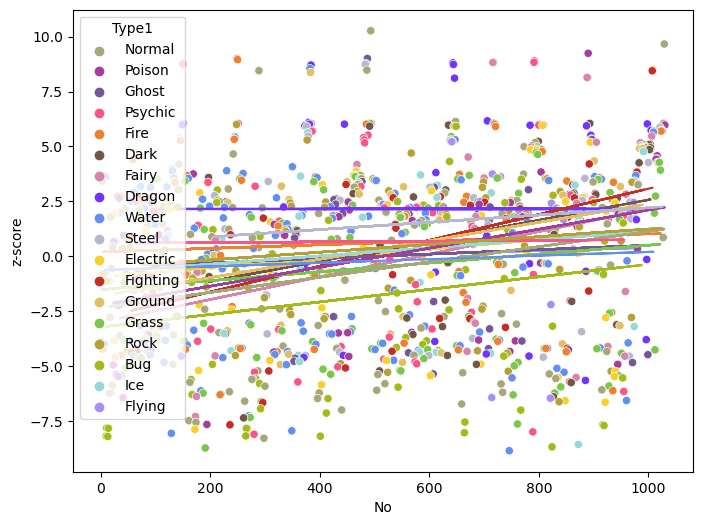

In [68]:
DecorrerGen(data_zscore, 'z-score')

Em primeira análise, apesar da bagunça nesse gráfico, é perceptível que o tipo dragão está no topo de todos. Entretanto, deve-se destacar que a linha de regressão do tipo dragão está constante, o que demonstra que os desenvolvedores estão criando Pokémon Dragão com estatísticas semelhantes ao decorrer dos jogos. Isso é um problema para esse tipo, pois enquanto permanece constante, é notório que muitos outros tipos estão crescendo ao decorrer do gráfico, e alguns ja o superaram tais como:

### Lutador vs. Dragão

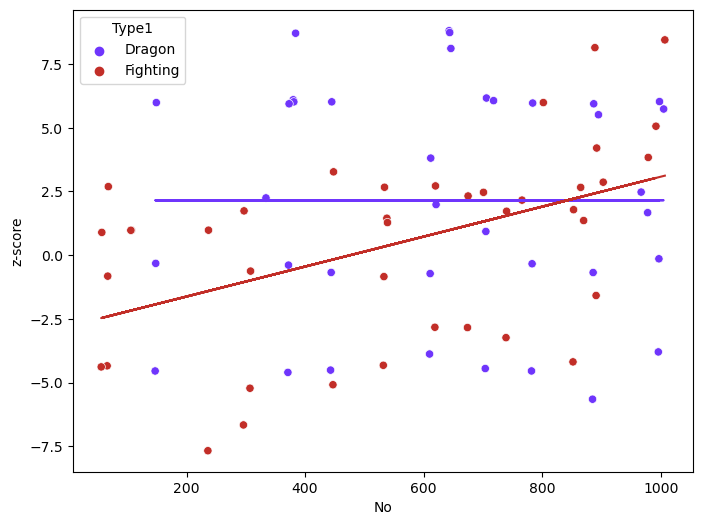

In [69]:
DecorrerGen(data_zscore, 'z-score', 'Fighting', 'Dragon')

### Dark vs. Dragão

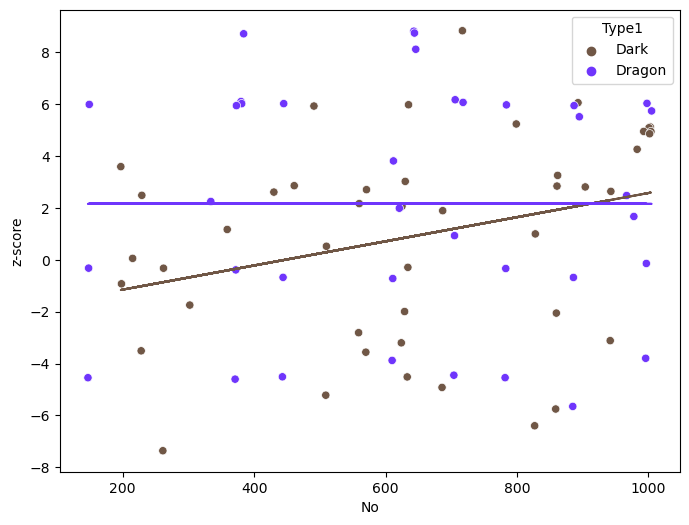

In [70]:
DecorrerGen(data_zscore, 'z-score', 'Dark', 'Dragon')

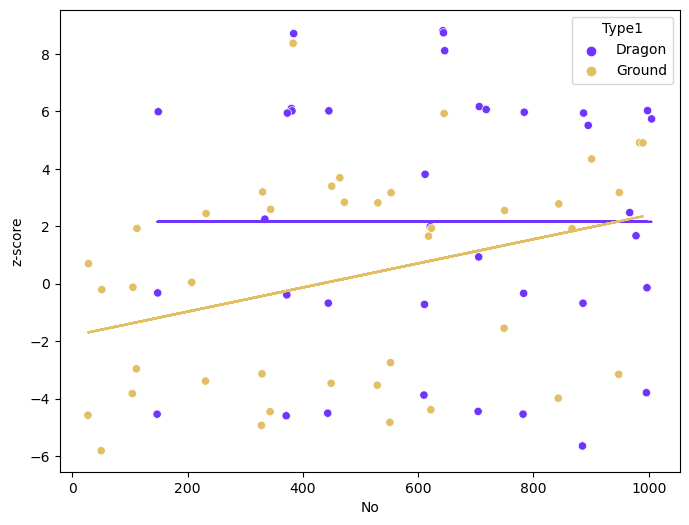

In [74]:
DecorrerGen(data_zscore, 'z-score', 'Ground', 'Dragon')

Concluindo, apesar do tipo dragão ser o mais forte em média, nas gerações atuais ele vem sendo superado pelo tipo Lutador, Sombrio e Terra, tudo indica que se houver mais jogos de Pokémon, o tipo dragão tende a ser superado mais e mais.

## 6. Quais são os pokémons favoritos da comunidade?

Primeiro, vamos mostrar quantos votos tivemos por geração. Como dito antes, foram mais de 50 mil votos válidos entre 7 gerações de Pokémons.

In [67]:
votos_geracao = favs.groupby('Geracao')['Votos'].sum() # agrupando os pokémons de todas gerações e somando o voto de cada
votos_geracao

Geracao
1    18289
2     9115
3     9469
4     7531
5     4391
6     2154
7     1776
Name: Votos, dtype: int64

### Gráfico de Barras

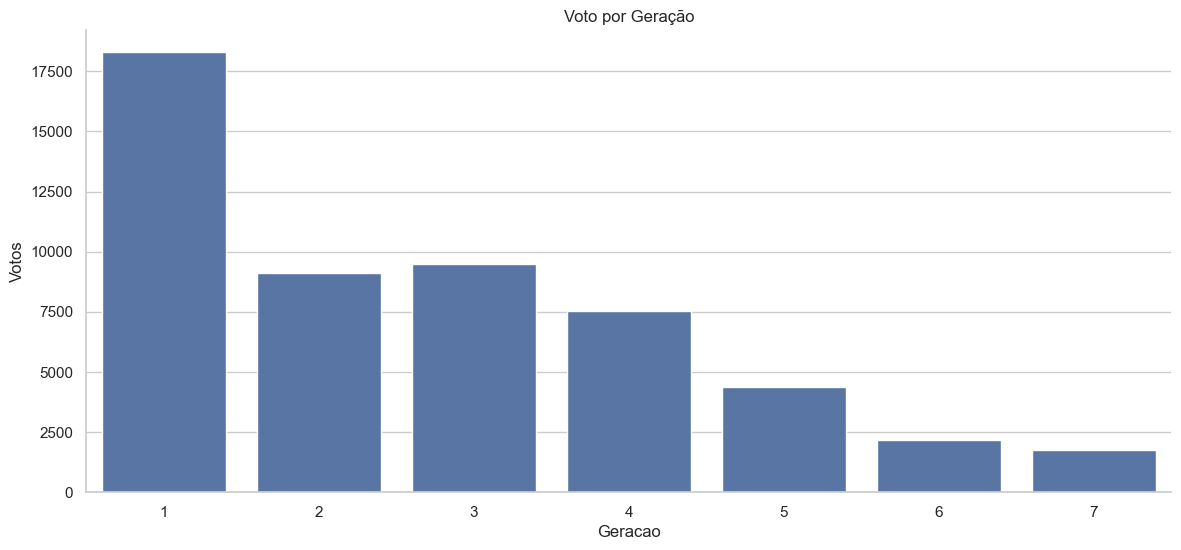

In [81]:
plt.figure(figsize=(14, 6)) # tamanho da figura
sns.set_palette('deep') # tipo de cor pro gráfico
sns.barplot(votos_geracao) # função pra criar o gráfico de barras
plt.axhline(color='gray', linestyle='--', linewidth=0.5) # adicionando as linhas pra melhor visualização
sns.despine() # removendo as linhas dos limites superior e à direita
plt.title("Voto por Geração") # titulo
plt.show() # mostrar gráfico.

É bem notório que a primeira geração foi a que teve mais votos. Tivemos um total de 18289 votos espalhados entre os pokémons da primeira geração, que é quase o dobro da terceira geração, a segunda com mais votos, com um total de 9469. A segunda e quarta gerações obtiveram entre 10000 e 7500 votos cada. Na quinta, tivemos uma queda para 4391 votos. Já a sexta e sétima gerações foram as menos votadas, acumulando menos de 2 mil votos em cada uma.

Por fim, finalmente, vamos verificar quem são os Pokémons favoritos. Iremos pegar o top 10 mais votados.

### Gráfico de Barras

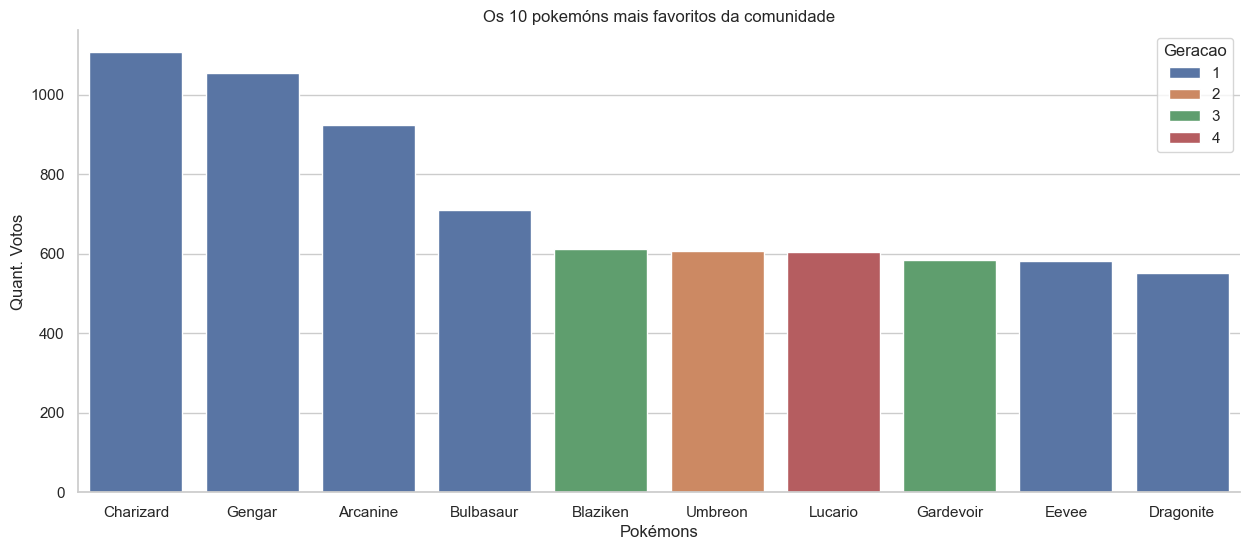

In [114]:
top10_pokemons = favs.sort_values(by='Votos', ascending=False) # Ordenando por votos em ordem decrescente e guardando em uma variável

plt.figure(figsize=(15,6)) # tamanho da figura
sns.barplot(data=top10_pokemons[:10], x='Pokemon', y='Votos', hue='Geracao', palette='deep') # função pra criar o gráfico
sns.despine() # apagando as linhas do limite superior e à direita
plt.title("Os 10 pokemóns mais favoritos da comunidade") # título
plt.xlabel('Pokémons') # nome pro eixo x
plt.ylabel('Quant. Votos') # nome pro eixo y
plt.show() # mostrar gráfico

Criamos uma variável para armazenar o nosso top 10 e a ordenamos decrescentemente com base nos votos de cada pokémon. Passamos ela como parâmetro, sendo o eixo x o nome do pokémon e o eixo y a quantidade de votos. Também aplicamos hue pra ver qual é a geração de cada um no top 10.

No nosso top 3 temos: em primeiro lugar _Charizard_, pokémon do tipo fogo e voador, com mais de 1107 votos. Em segundo temos _Gengar_, que é tipo fantasma e venenoso, com 1056 votos. Ambos foram os únicos que atingiram mais de mil votos da comunidade. _Arcanine_, também do tipo fogo, vem logo em seguida com 923 votos.

Do quarto ao décimo colocado temos, respectivamente: Bulbassauro, com 710 votos; Blaziken, com 613 votos; Umbreon, com 607 votos; Lucario, com 604 votos; Gardevoir com 585 votos; Eevee, com 581 votos; Dragonite, com 551 votos.

Algo interessante de se notar é que, dos dez, seis deles são da primeira geração, o que corrobora com o favoritismo dos primeiros jogos da franquia e, também, das primeiras animações.

E quem seriam os Pokémons menos favoritos da comunidade?

### Gráfico de Barras

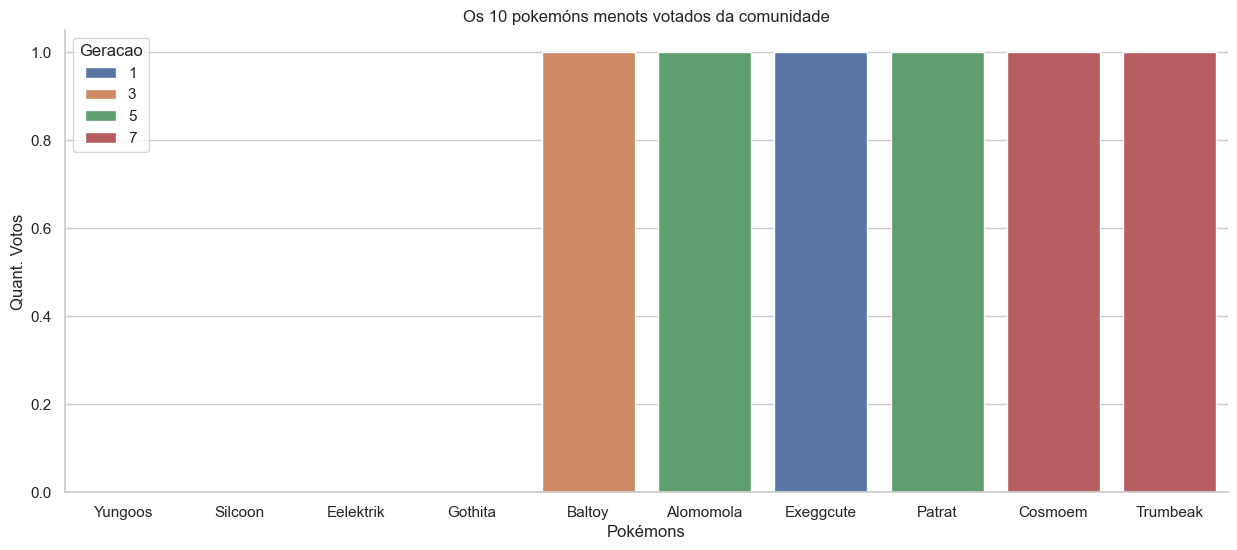

In [126]:
piores10_pokemons = favs.sort_values(by='Votos', ascending=True)

plt.figure(figsize=(15,6))
sns.barplot(data=piores10_pokemons[:10], x='Pokemon', y='Votos', hue='Geracao', palette='deep')
sns.despine()
plt.title("Os 10 pokemóns menots votados da comunidade")
plt.xlabel('Pokémons')
plt.ylabel('Quant. Votos')
plt.show()

Tivemos 4 pokémons que não receberam nenhum único voto, que foram eles: Yungoos, Silcoon, Eelektrik e Gothita. Vamos remover os pokémons que não receberam votos e ver como fica.

### Gráfico de Barras

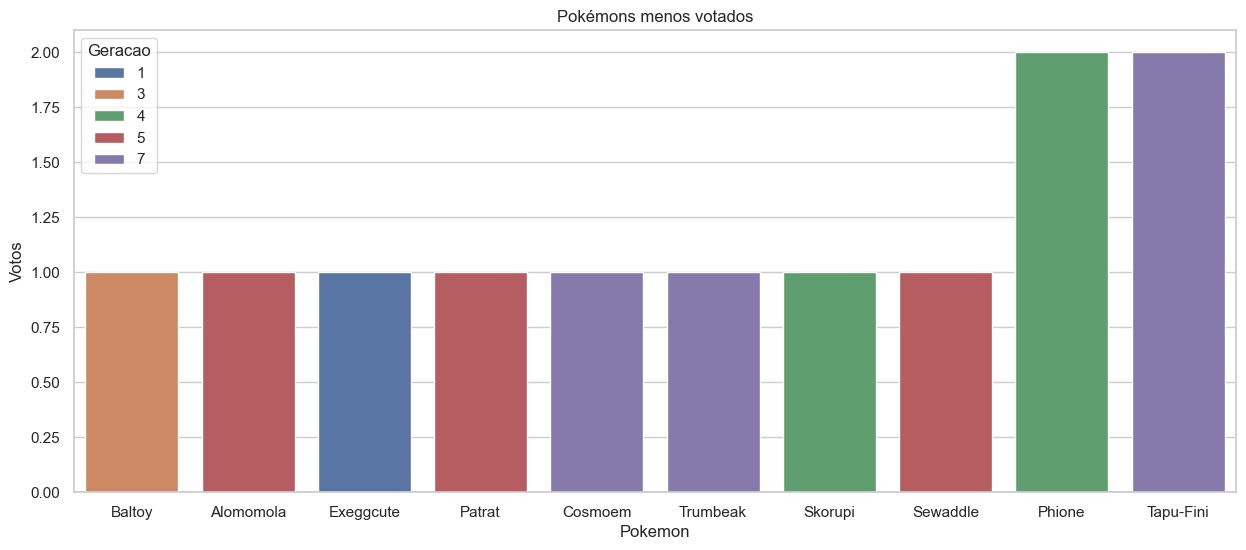

In [182]:
pot10_pokemons = piores10_pokemons[piores10_pokemons['Votos'] > 0] # excluindo os que não receberam nenhum voto

plt.figure(figsize=(15, 6)) # tamanho da figura
sns.barplot(data=pot10_pokemons[:10], x='Pokemon', y='Votos', hue='Geracao', palette='deep') # função pra criar o gráfico
plt.title('Pokémons menos votados') # título
plt.show() # mostrar gráfico

Excluindo os pokémons que não receberam nenhum voto, temos o nosso top 10 menos votados. 8 deles receberam apenas um único voto e os outros dois receberam exatos 2 votos. Além disso, podemos notar que estão presentes 3 pokémons da geração 7 e 3 da geração 5, o que bate com a quantidade de votos por geração vista anteriormente. 

## _Conclusão_

Com tudo analisado, podemos, facilmente, afirmar que as primeiras gerações, em especial a primeira e a segunda, tiveram um maior impacto com o público. Tendo faturado mais de 30 milhões de dólares, Pokémon Red & Blue, a primeira geração, segue firme na liderança como o videogame mais vendido. Isso também é visível nas animações, pois como visto anteriormente, tanto a primeira temporada do anime, quanto o primeiro filme, ambos fazem parte dos favoritos da comunidade, possuindo notas consideradas boas e uma ótima bilheteria por parte do longa-metragem. Contribuindo ainda mais, temos os pokémons favoritos pela comunidade, na qual 6 dos 10 mais votados são da primeira geração.

Ademais, foi possível concluir que a quantidade de pokemons por geração vem oscilando, ficando as vezes bem abaixo ou bem acima da média. Além disso, dado os dados analisados anteriormente, existem tipos de pokemons que se sobressaem dos outros tipos em determinada característica, como, por exemplo:

- No quesito Ataque, o pokemon do tipo Lutador é melhor que um pokemon do tipo inseto;
- No quesito velocidade, um pokemon do tipo életrico é melhor do que um do tipo pedra.

Mas também temos os pokemons do tipo Dragão que, estatísticamente, são considerados os mais fortes da franquia. Apesar do tipo dragão ser o tipo mais forte, é estranho o fato de que entre os 10 pokemons mais poderosos, nenhum é representado pelo tipo primário dragão. Isso se deve ao fato de que, apesar de não estarem no pódio, os tipo dragão são representados por muitos pokemons denominados 'Pseudo-Lendários', presentes em quase todas as gerações, que são aqueles pokemons em que possuem estatísticas que se comparam aos Lendários mas que são apenas raros.

Esses resultados são bem interessante, pois mostra que, mesmo após 25 anos, com inúmeras versões lançadas, as primeiras versões seguem em alta e que continuam sendo a melhor porta de entrada para novos públicos. Infelizmente devido a falta de algumas informações, como a fraqueza de cada pokemon, não conseguimos definir qual seria a melhor equipe para os jogos.

Além de tudo isso apresentado, há também o famigerado jogo de cartas da franquia, o _Pokémon: Trading Card Game_, que é mundialmente popular, tendo campeonatos e tudo mais. O ramo do TCG é muito extenso, tendo sido produzida bilhares de cartas dos mais diversos tipos, e é considerado como um dos pilares da franquia Pokémon. Mas isso fica para uma próxima geração de projeto.